In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
np.random.seed(7)
random.seed(7)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
vdem = pd.read_csv('/content/drive/MyDrive/V-Dem-CY-Full+Others-v14.csv')

<ipython-input-4-4e4015fcbf94>:1: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  vdem = pd.read_csv('/content/drive/MyDrive/V-Dem-CY-Full+Others-v14.csv')


In [ ]:
vdem.keys()

Index(['country_name', 'country_text_id', 'country_id', 'year',
       'historical_date', 'project', 'historical', 'histname', 'codingstart',
       'codingend',
       ...
       'e_mipopula', 'e_miurbani', 'e_pefeliex', 'e_wb_pop', 'e_pechmor',
       'e_miinteco', 'e_civil_war', 'e_miinterc', 'e_pt_coup',
       'e_pt_coup_attempts'],
      dtype='object', length=4607)

In [ ]:
keys = list(vdem.keys())
len(keys)

4607

In [ ]:
# for model dataset: getting rid of vdem model characteristic columns and different scaled estimates
cleaned_keys = []
for k in keys:
    if ('code' not in k) and ('_sd' not in k) and ('_3C' not in k) and ('_4C' not in k) and ('_5C' not in k):
        if ('_mean' not in k) and ('_nr' not in k) and ('_osp' not in k) and ('_pct' not in k) and ('_ord' not in k):
            if ('_mode' not in k):
                cleaned_keys.append(k)

In [ ]:
len(cleaned_keys)

1060

In [ ]:
nr_keys = []
for k in keys:
    if '_nr' in k:
        nr_keys.append(k)

In [ ]:
test = vdem[(vdem['year'] > 1960)]
test = test[test['e_wb_pop'] > 50_000_000]
test[nr_keys].describe()

,v2eldonate_nr,v2elpubfin_nr,v2elembaut_nr,v2elembcap_nr,v2elmulpar_nr,v2elrgstry_nr,v2elvotbuy_nr,v2elirreg_nr,v2elintim_nr,v2elpeace_nr,...,v2medentrain_nr,v2edscpatriot_nr,v2edscpatriotcb_nr,v2edscextracurr_nr,v2edtequal_nr,v2temonitor_nr,v2edteunion_nr,v2edteunionindp_nr,v2edtehire_nr,v2edtefire_nr
count,1252.000000,1252.000000,1252.000000,1252.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,...,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000
mean,10.214058,10.191693,9.980831,9.805911,9.517544,9.172515,9.470760,9.453216,9.456140,9.269006,...,6.694195,6.850368,7.014718,6.804579,6.816844,6.531480,6.843009,6.260016,6.724448,6.699918
std,5.274907,5.301765,5.207258,5.178959,4.954158,4.967585,4.787327,4.796978,4.831726,4.744267,...,4.195862,4.012625,4.149590,4.091256,4.117443,3.928216,4.175748,4.178242,4.128277,4.161714
min,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,...,6.000000,6.000000,6.000000,5.000000,6.000000,5.000000,5.000000,5.000000,6.000000,6.000000
75%,14.000000,14.000000,13.000000,13.000000,13.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,9.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,9.000000,10.000000,10.000000
max,30.000000,31.000000,30.000000,29.000000,23.000000,24.000000,25.000000,24.000000,24.000000,23.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000


In [ ]:
vdem_pop = vdem.dropna(subset=['e_wb_pop'])[cleaned_keys]

In [ ]:
vdem_pop.describe()

,country_id,year,project,historical,codingstart,codingend,codingstart_contemp,codingend_contemp,codingstart_hist,codingend_hist,...,e_mipopula,e_miurbani,e_pefeliex,e_wb_pop,e_pechmor,e_miinteco,e_civil_war,e_miinterc,e_pt_coup,e_pt_coup_attempts
count,10182.000000,10182.000000,10182.000000,10182.000000,10182.000000,10182.0,10182.00000,10182.0,4292.000000,4292.000000,...,5.818000e+03,5563.000000,5714.000000,1.018200e+04,10120.000000,6297.000000,6582.000000,6297.000000,9303.000000,9303.000000
mean,95.646631,1992.113534,0.006678,0.421528,1867.189256,2023.0,1910.03958,2023.0,1801.283085,1922.962721,...,2.667720e+04,0.337113,62.547123,3.261888e+07,83.171369,0.055582,0.080978,0.137208,0.022036,0.044502
std,56.774947,18.123919,0.115385,0.493828,61.421139,0.0,22.02784,0.0,21.981895,11.283326,...,1.033311e+05,0.227345,12.668682,1.193799e+08,83.675067,0.229131,0.272823,0.344094,0.154654,0.236340
min,3.000000,1960.000000,0.000000,0.000000,1789.000000,2023.0,1900.00000,2023.0,1789.000000,1918.000000,...,4.166200e+01,0.044000,30.810000,4.170000e+04,1.470000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,1977.000000,0.000000,0.000000,1789.000000,2023.0,1900.00000,2023.0,1789.000000,1920.000000,...,2.031052e+03,0.182000,51.439250,2.367802e+06,17.100000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.000000,1993.000000,0.000000,0.000000,1900.000000,2023.0,1900.00000,2023.0,1789.000000,1920.000000,...,5.846211e+03,0.302000,64.786000,7.179500e+06,51.300000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,140.000000,2008.000000,0.000000,1.000000,1903.000000,2023.0,1911.00000,2023.0,1809.000000,1920.000000,...,1.532781e+04,0.414500,73.585750,2.129082e+07,127.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,210.000000,2022.000000,2.000000,1.000000,2011.000000,2023.0,2011.00000,2023.0,1878.000000,2010.000000,...,1.262645e+06,2.430000,84.580000,1.417173e+09,423.000000,1.000000,1.000000,1.000000,2.000000,4.000000


In [ ]:
# Define regions with all provided countries
regions = {
    "North America": [
        "Canada", "Mexico", "United States of America"
    ],
    "Latin America": [
        "Argentina", "Barbados", "Bolivia", "Brazil", "Chile", "Colombia", "Costa Rica",
        "Cuba", "Dominican Republic", "Ecuador", "El Salvador", "Guatemala", "Guyana",
        "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Paraguay",
        "Peru", "Suriname", "Trinidad and Tobago", "Uruguay", "Venezuela"
    ],
    "Europe": [
        "Albania", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria",
        "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France",
        "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo", "Latvia",
        "Lithuania", "Luxembourg", "Malta", "Moldova", "Montenegro", "Netherlands",
        "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia", "Serbia",
        "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom"
    ],
    "Sub-Saharan Africa": [
        "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cape Verde",
        "Central African Republic", "Chad", "Comoros", "Democratic Republic of the Congo",
        "Djibouti", "Equatorial Guinea", "Eswatini", "Ethiopia", "Gabon", "Ghana",
        "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia",
        "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Mozambique", "Namibia",
        "Niger", "Nigeria", "Republic of the Congo", "Rwanda", "Sao Tome and Principe",
        "Senegal", "Seychelles", "Sierra Leone", "Solomon Islands", "Somalia", "Somaliland",
        "South Africa", "South Sudan", "Sudan", "Tanzania", "The Gambia", "Togo",
        "Uganda", "Zambia", "Zimbabwe", "Zanzibar"
    ],
    "Middle East & North Africa (MENA)": [
        "Algeria", "Bahrain", "Egypt", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
        "Lebanon", "Libya", "Morocco", "Oman", "Palestine/Gaza", "Palestine/West Bank",
        "Qatar", "Saudi Arabia", "South Yemen", "Syria", "Tunisia", "Turkey", "United Arab Emirates", "Yemen"
    ],
    "South Asia": [
        "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"
    ],
    "East Asia": [
        "China", "Hong Kong", "Japan", "Mongolia", "North Korea", "South Korea", "Taiwan"
    ],
    "Southeast Asia": [
        "Burma/Myanmar", "Cambodia", "Indonesia", "Laos", "Malaysia", "Philippines",
        "Singapore", "Thailand", "Timor-Leste", "Vietnam"
    ],
    "Oceania": [
        "Australia", "Fiji", "New Zealand", "Papua New Guinea", "Vanuatu"
    ]
}


In [ ]:
# Function to filter dataset by region
def filter_by_region(df, region_name):
    if region_name not in regions:
        raise ValueError(f"Region '{region_name}' not found. Available regions: {list(regions.keys())}")
    return df[df['country_name'].isin(regions[region_name])]

In [ ]:
# Run the model for a specific region
def run_model_for_region(region_name):
    region_data = filter_by_region(vdem_pop, region_name)
    print(f"Running model for {region_name}...")
    model, top_features, corrs = imputing_model(region_data, 'e_fh_status', split=15)
    return model, top_features, corrs

In [ ]:
def top_correlations(base_df, column: str):
    """
    Compute correlation for each column in the DataFrame with the specified column.
    """
    df = base_df.dropna(subset=[column])
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")

    df = df.select_dtypes(include=["number"]) #only numerical data

    correlations = df.corr()[column].drop(labels=[column])  #exclude self-correlation
    top_correlations = correlations.abs().sort_values(ascending=False) #sort by absolute value
    top_100 = top_correlations.head(100).index.tolist()

    return top_100, correlations


def print_correlations(top, corr_values, num, count_flag=0):
    """
    Prints and returns the top correlations that meet the avaliable data count flag.
    """
    filtered_top = []
    for col in top[:num]:
        if vdem[col].count() > count_flag:
            print(f"{col}: {corr_values[col]:.4f};                    " + "Count: " + str(vdem[col].count()))
            filtered_top.append(col)
    return filtered_top

def imputing_model(base_df, column: str, num_feats = 100, split = 15):
    """
    Train and evaluate a model to impute missing values in the specified column.

    Random Forest is for any vdem data we will impute, not sure if will use yet.
    """

    if len(base_df[column].unique()) > 10:
        model = RandomForestRegressor
        metric = r2_score
        alpha_mod = 0.01
    else:
        model = DecisionTreeClassifier
        metric = accuracy_score
        alpha_mod = 0


    #making sure the training df has no nulls for column to be imputed
    df = base_df.dropna(subset=[column])
    top, corrs = top_correlations(base_df, column)
    filtered_top = print_correlations(top, corrs, 100, 9259)

    # Exclude high-level variables that dominate feature importance
    excluded_features = [
      'v2x_api', 'v2x_libdem', 'v2x_mpi', 'e_lexical_index',
      'v2x_accountability', 'v2x_partipdem', 'v2x_clpol',
      'v2x_veracc', 'v2x_frassoc_thick', 'v2x_delibdem'
        ]

    filtered_top = [feat for feat in filtered_top if feat not in excluded_features]


    X = df[filtered_top[:num_feats]]
    y = df[column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7) #20% saved for test
    clf = model(min_samples_split=15, random_state=42) if model is RandomForestRegressor else model(min_samples_split=15, random_state=42)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = metric(y_test, y_pred)
    print("Train Accuracy:", metric(y_train, clf.predict(X_train)))
    print("Test Accuracy:", accuracy)
    plt.scatter(y_test, y_pred, alpha=0.01 + alpha_mod)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values")
    plt.show()

    print("Importances for", column)

    importances = clf.feature_importances_
    std = np.std([clf.feature_importances_ for _ in range(100)], axis=0)
    features = X.columns

    indices = np.argsort(importances)[-15:][::-1]
    top_features = features[indices]
    top_importances = importances[indices]
    top_std = std[indices]
    plt.figure(figsize=(16, 12))
    plt.barh(top_features, top_importances, xerr=top_std, align='center')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis()  #To display the highest importance at the top
    plt.show()

    return clf, filtered_top, corrs

Running model for North America...
e_miurbani: 0.9623;                    Count: 17078
v2x_execorr: 0.9210;                    Count: 27038
v2xnp_regcorr: 0.9142;                    Count: 27230
v2x_rule: -0.9133;                    Count: 27346
v2x_neopat: 0.9030;                    Count: 26188
v2xedvd_me_inco: 0.9029;                    Count: 12692
v2x_liberal: -0.9022;                    Count: 26085
v2mecrit: -0.9004;                    Count: 27166
v2x_libdem: -0.8998;                    Count: 25350
v2x_pubcorr: 0.8983;                    Count: 27190
v2clrgwkch_10: 0.8981;                    Count: 17901
e_miurbpop: 0.8957;                    Count: 17472
v2edideolch_5: -0.8935;                    Count: 10676
v2x_freexp: -0.8930;                    Count: 27247
v2exbribe: -0.8921;                    Count: 27135
v2lgcrrpt: -0.8919;                    Count: 18304
v2x_corr: 0.8917;                    Count: 26841
v2xnp_client: 0.8898;                    Count: 25490
v2xlg_legc

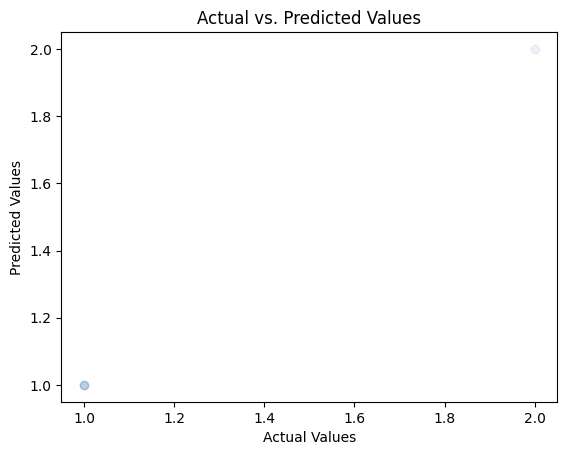

Importances for e_fh_status


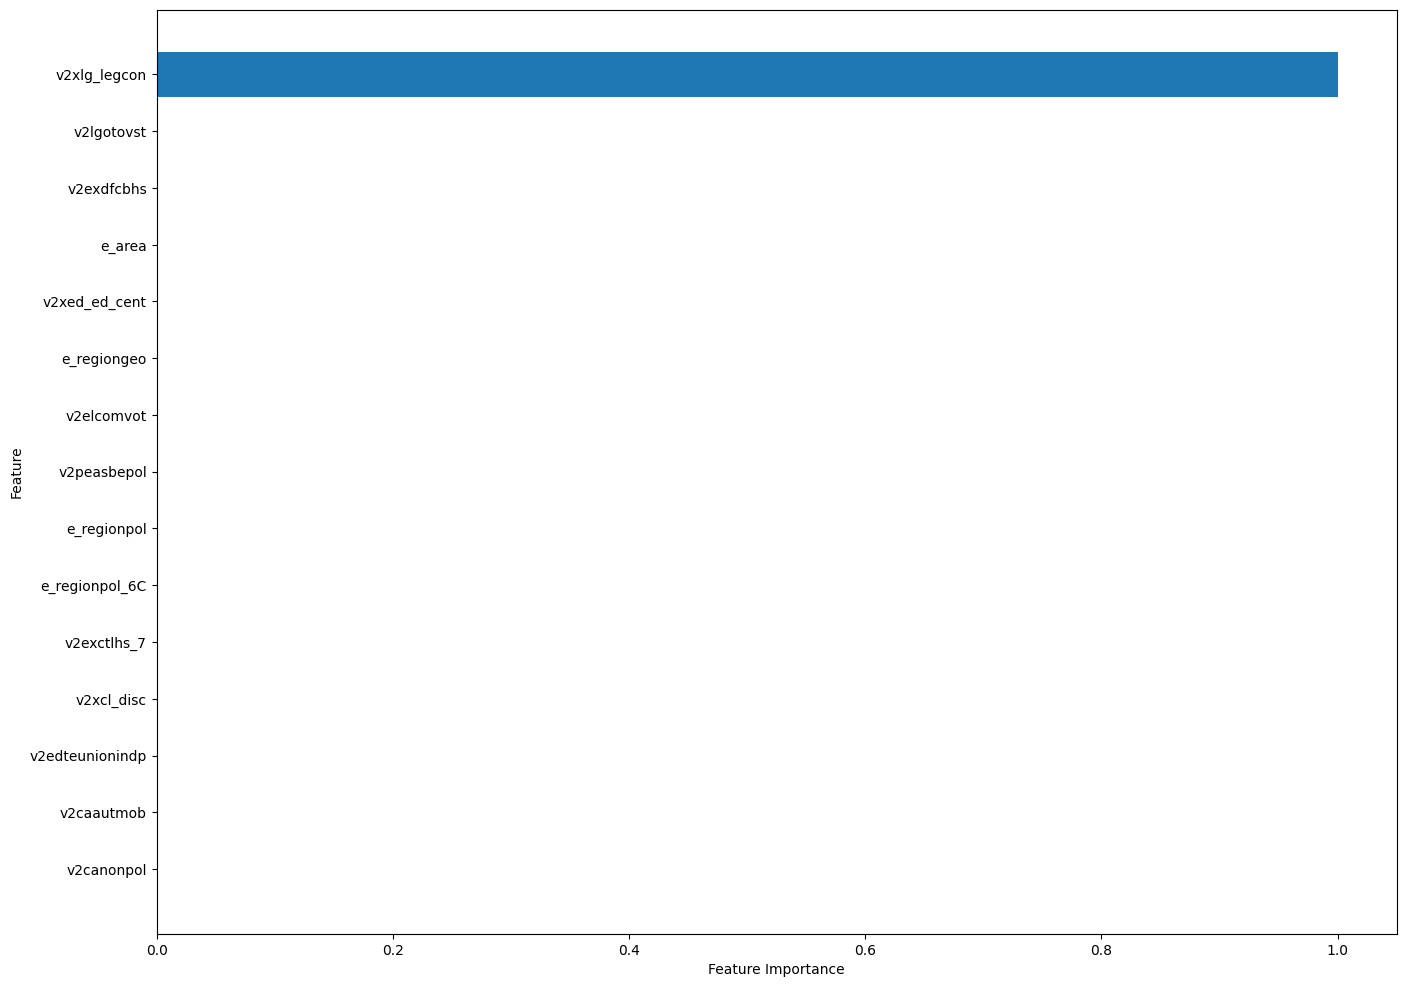

Running model for Latin America...
v2x_accountability: -0.7450;                    Count: 19362
v2x_polyarchy: -0.7419;                    Count: 26595
v2x_api: -0.7400;                    Count: 26595
v2x_diagacc: -0.7391;                    Count: 19362
v2xedvd_me_inco: 0.7314;                    Count: 12692
v2x_freexp_altinf: -0.7312;                    Count: 27198
v2x_EDcomp_thick: -0.7308;                    Count: 26771
v2x_clpol: -0.7248;                    Count: 27393
v2x_regime_amb: -0.7204;                    Count: 19401
v2x_freexp: -0.7204;                    Count: 27247
v2x_liberal: -0.7202;                    Count: 26085
v2x_libdem: -0.7198;                    Count: 25350
e_polity2: -0.7198;                    Count: 17156
v2x_frassoc_thick: -0.7167;                    Count: 27061
v2cldiscm: -0.7163;                    Count: 27693
v2xme_altinf: -0.7143;                    Count: 27174
v2x_veracc: -0.7134;                    Count: 19362
v2xedvd_me_cent: 0.7123;   

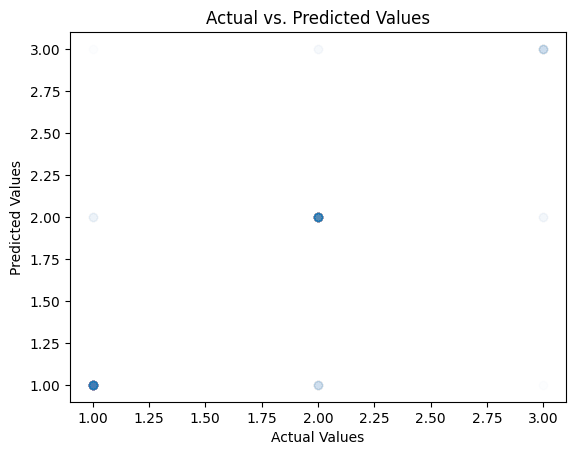

Importances for e_fh_status


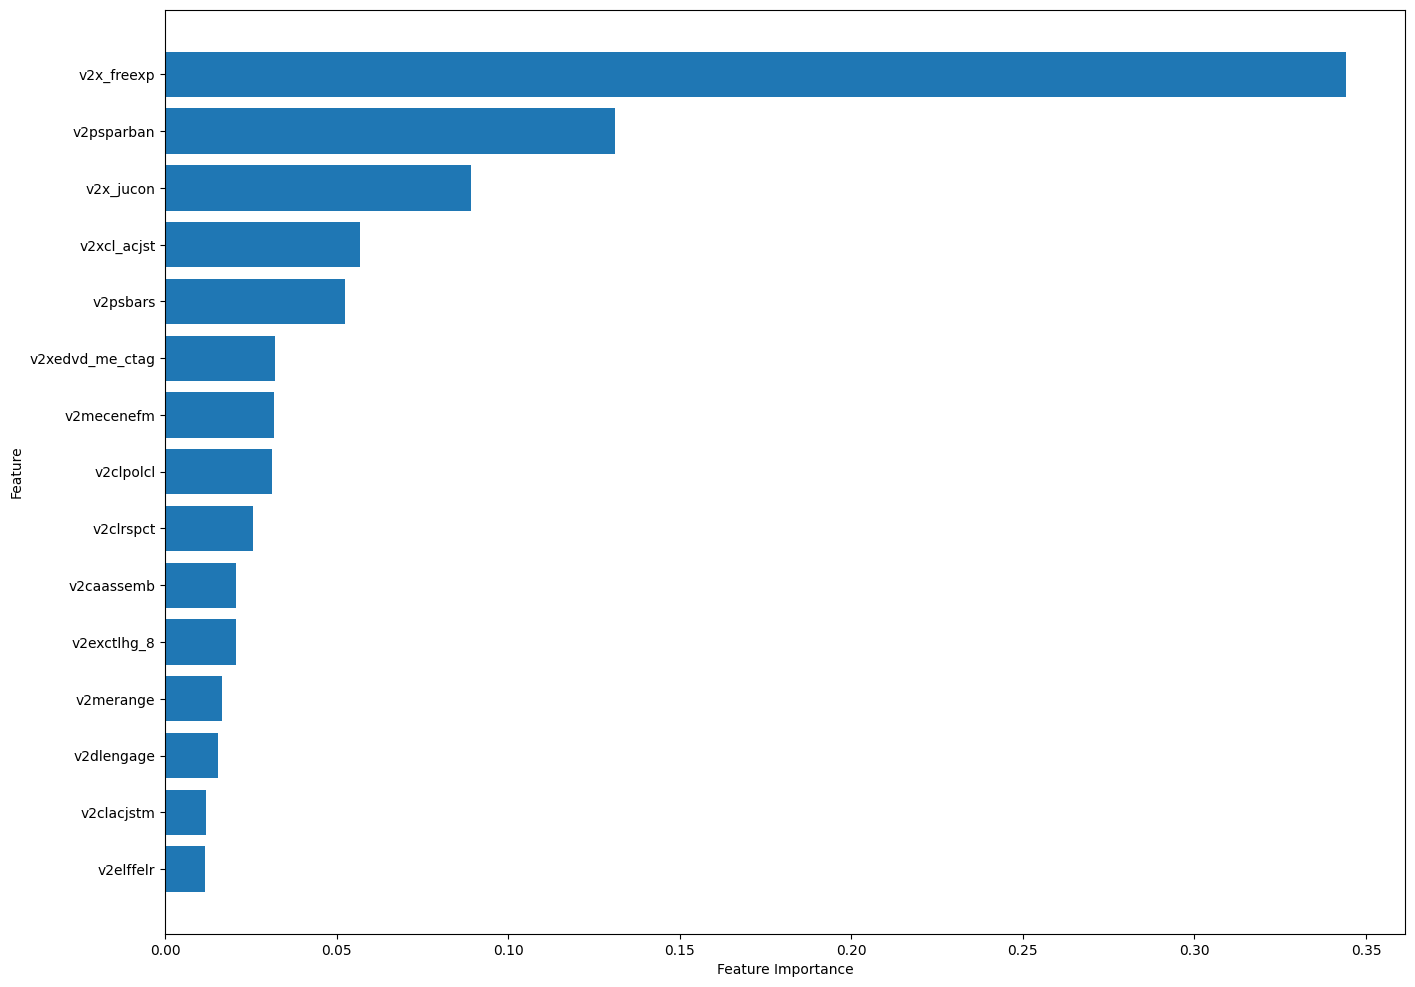

Running model for Europe...
v2xedvd_me_cent: 0.9268;                    Count: 12692
v2x_liberal: -0.9242;                    Count: 26085
v2x_polyarchy: -0.9241;                    Count: 26595
v2xedvd_me_inco: 0.9232;                    Count: 12692
v2x_api: -0.9215;                    Count: 26595
v2x_EDcomp_thick: -0.9190;                    Count: 26771
v2x_accountability: -0.9189;                    Count: 19362
v2x_veracc: -0.9164;                    Count: 19362
v2xnp_pres: 0.9137;                    Count: 26767
v2x_freexp_altinf: -0.9131;                    Count: 27198
v2x_libdem: -0.9109;                    Count: 25350
v2xed_ed_ctag: 0.9097;                    Count: 10702
v2xme_altinf: -0.9091;                    Count: 27174
v2xedvd_me_ctag: 0.9083;                    Count: 10720
v2elfrfair: -0.9074;                    Count: 15660
v2x_freexp: -0.9066;                    Count: 27247
v2x_mpi: -0.9030;                    Count: 26595
v2x_clpol: -0.8991;                  

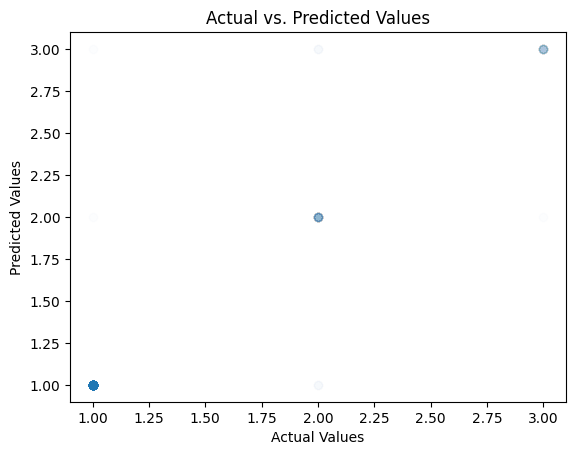

Importances for e_fh_status


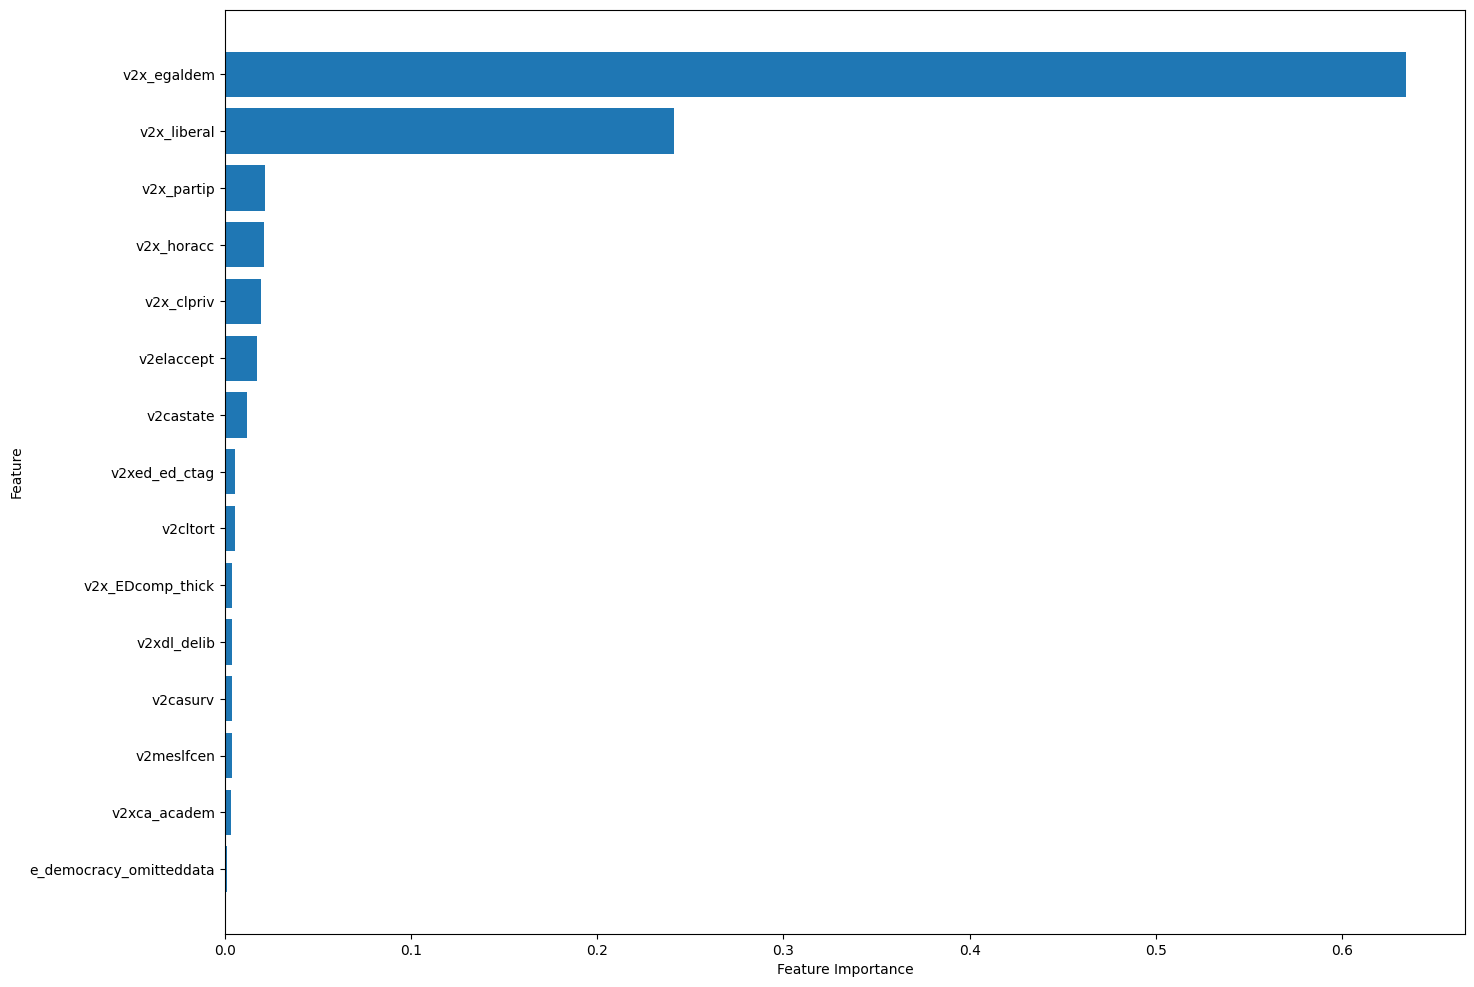

Running model for Sub-Saharan Africa...
v2x_libdem: -0.8099;                    Count: 25350
v2x_polyarchy: -0.7943;                    Count: 26595
v2x_mpi: -0.7896;                    Count: 26595
v2x_partipdem: -0.7847;                    Count: 25982
v2x_EDcomp_thick: -0.7737;                    Count: 26771
v2x_delibdem: -0.7733;                    Count: 19308
v2x_egaldem: -0.7684;                    Count: 19308
v2x_accountability: -0.7611;                    Count: 19362
v2xel_frefair: -0.7548;                    Count: 27612
v2x_liberal: -0.7539;                    Count: 26085
v2x_api: -0.7479;                    Count: 26595
v2x_regime_amb: -0.7441;                    Count: 19401
v2xnp_pres: 0.7339;                    Count: 26767
v2x_civlib: -0.7332;                    Count: 27303
v2x_clpol: -0.7194;                    Count: 27393
e_lexical_index: -0.7175;                    Count: 26721
e_polity2: -0.7145;                    Count: 17156
v2caassemb: -0.7145;            

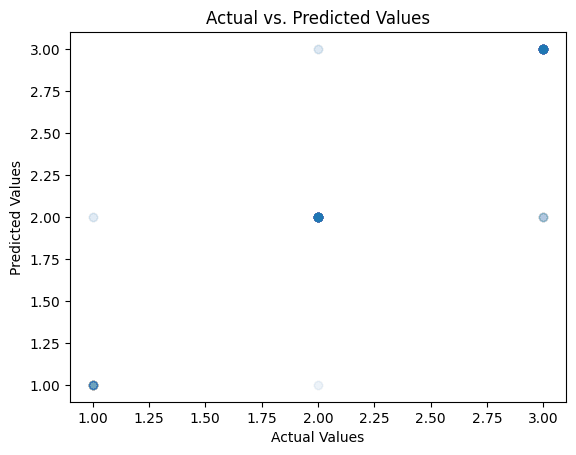

Importances for e_fh_status


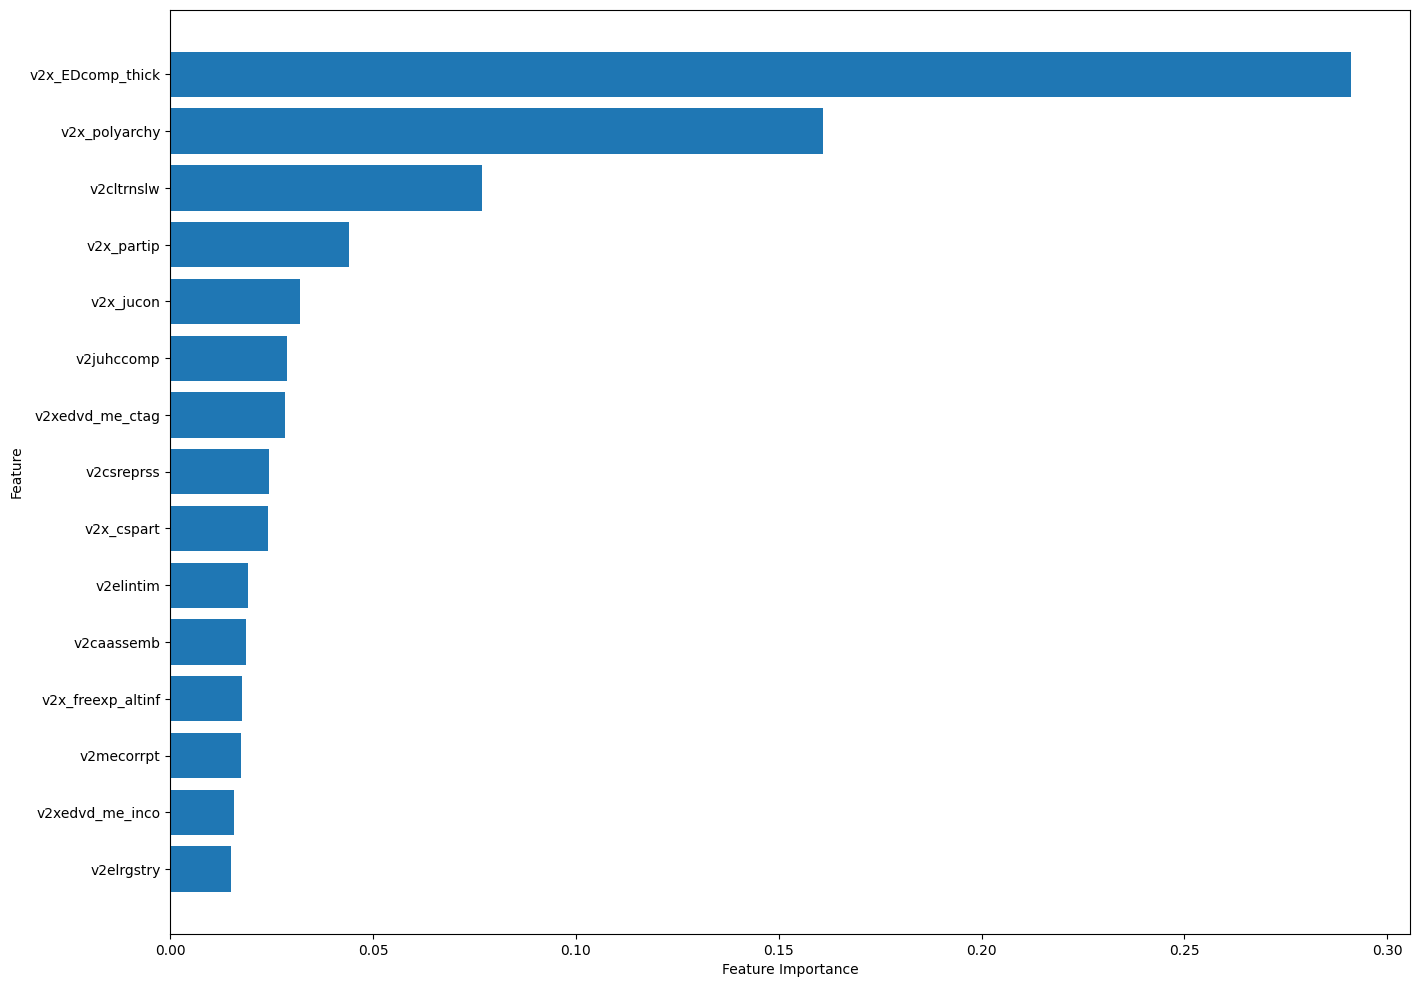

Running model for Middle East & North Africa (MENA)...
v2x_libdem: -0.7512;                    Count: 25350
v2x_liberal: -0.7166;                    Count: 26085
v2xed_ed_ctag: 0.7011;                    Count: 10702
v2casurv: -0.6942;                    Count: 14894
e_democracy_omitteddata: -0.6729;                    Count: 17631
v2x_delibdem: -0.6662;                    Count: 19308
e_boix_regime: -0.6660;                    Count: 17855
v2lgoppart: -0.6651;                    Count: 18118
v2edideolch_4: -0.6628;                    Count: 10676
v2x_mpi: -0.6514;                    Count: 26595
v2xca_academ: -0.6509;                    Count: 15155
v2cafexch: -0.6489;                    Count: 14902
v2x_neopat: 0.6474;                    Count: 26188
v2x_polyarchy: -0.6375;                    Count: 26595
v2cainsaut: -0.6348;                    Count: 14891
v2x_partipdem: -0.6343;                    Count: 25982
v2xedvd_me_ctag: 0.6343;                    Count: 10720
v2xnp_pres: 0.6

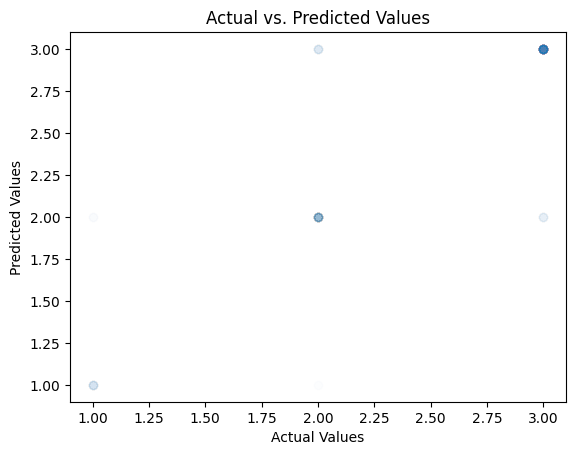

Importances for e_fh_status


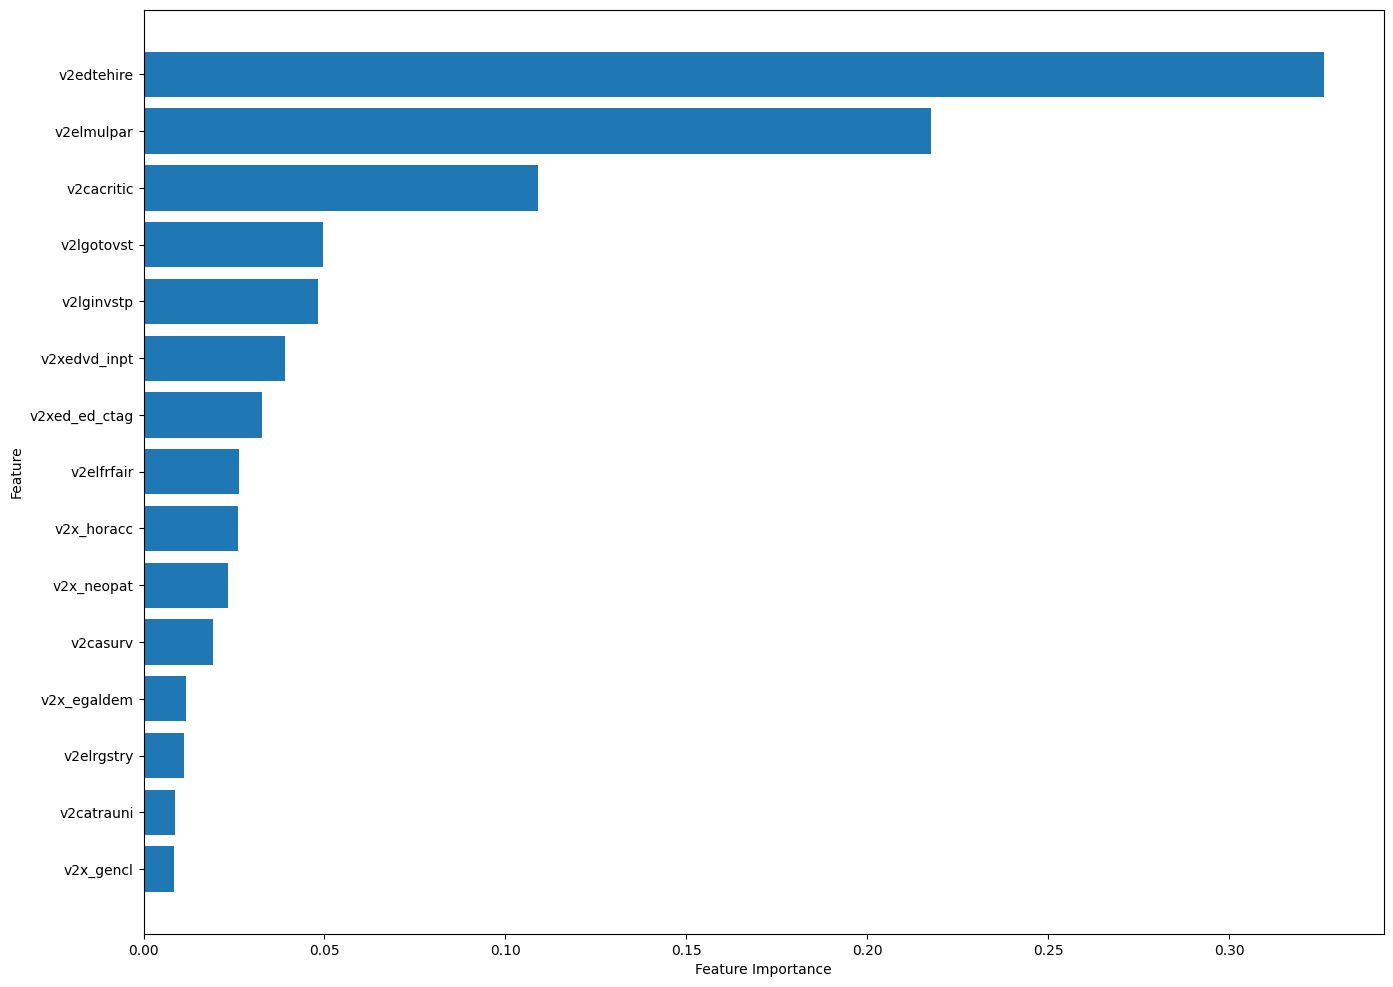

Running model for South Asia...
v2elrgpwr: -0.7535;                    Count: 19312
v2exctlhg_5: 0.6794;                    Count: 13048
v2exdfpphs: -0.6583;                    Count: 27047
v2elembaut: -0.6583;                    Count: 25197
v2x_libdem: -0.6580;                    Count: 25350
e_polity2: -0.6507;                    Count: 17156
v2x_mpi: -0.6444;                    Count: 26595
v2x_polyarchy: -0.6439;                    Count: 26595
v2xel_frefair: -0.6423;                    Count: 27612
v2x_partipdem: -0.6344;                    Count: 25982
v2svinlaut: -0.6281;                    Count: 27531
v2exaphogp: -0.6281;                    Count: 11348
v2x_accountability: -0.6229;                    Count: 19362
v2x_EDcomp_thick: -0.6208;                    Count: 26771
v2x_veracc: -0.6197;                    Count: 19362
v2x_regime: -0.6107;                    Count: 19401
v2x_regime_amb: -0.6104;                    Count: 19401
e_lexical_index: -0.6087;                    

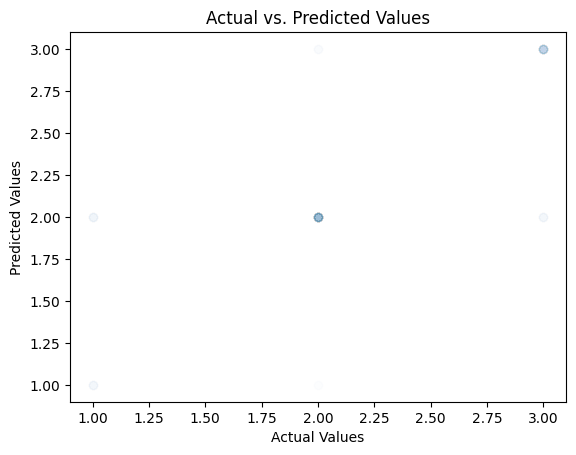

Importances for e_fh_status


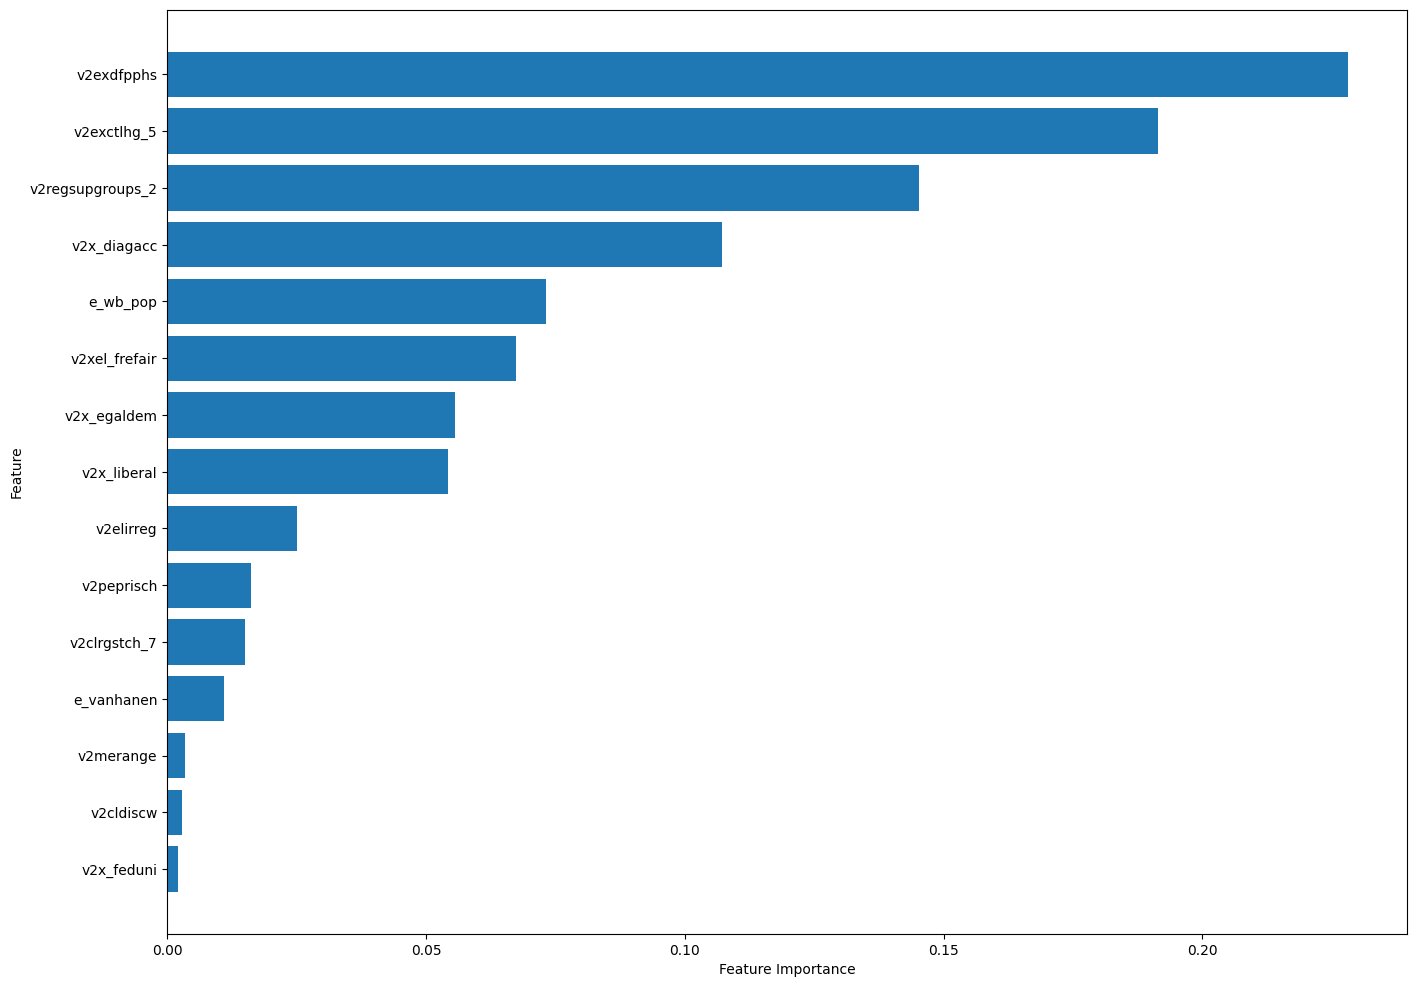

Running model for East Asia...
v2exremhog: -0.9773;                    Count: 12803
e_lexical_index: -0.9750;                    Count: 26721
e_boix_regime: -0.9696;                    Count: 17855
e_democracy_omitteddata: -0.9696;                    Count: 17631
e_polity2: -0.9671;                    Count: 17156
v2clrelig: -0.9463;                    Count: 27616
v2psbars: -0.9463;                    Count: 27064
v2psoppaut: -0.9453;                    Count: 23100
v2elembaut: -0.9453;                    Count: 25197
v2merange: -0.9441;                    Count: 27130
v2xedvd_me_ctag: 0.9435;                    Count: 10720
v2x_frassoc_thick: -0.9434;                    Count: 27061
v2x_liberal: -0.9415;                    Count: 26085
v2xme_altinf: -0.9393;                    Count: 27174
v2x_accountability: -0.9375;                    Count: 19362
v2xedvd_me_inco: 0.9369;                    Count: 12692
e_peaveduc: -0.9368;                    Count: 14729
v2x_api: -0.9353;         

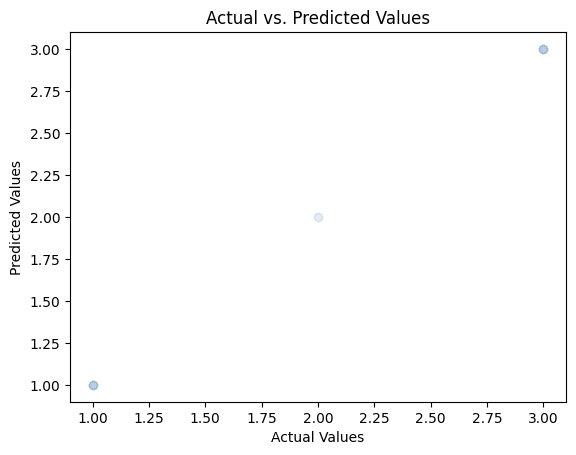

Importances for e_fh_status


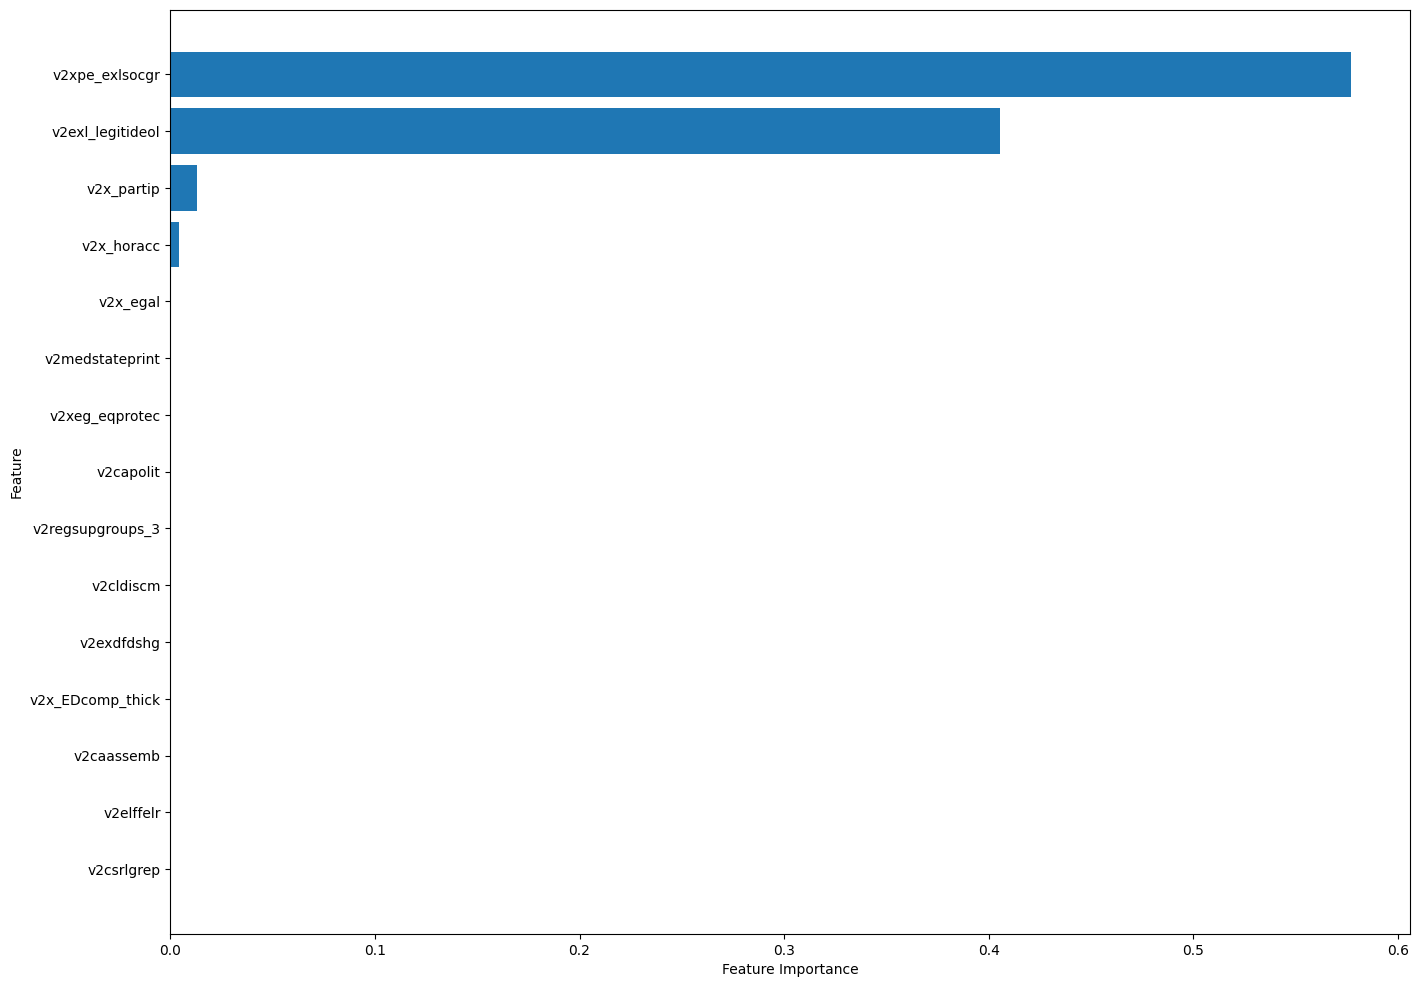

Running model for Southeast Asia...
v2jureview: -0.7801;                    Count: 27008
v2juhccomp: -0.7505;                    Count: 23638
v2xca_academ: -0.7433;                    Count: 15155
v2x_libdem: -0.7413;                    Count: 25350
v2edideolch_rec: -0.7389;                    Count: 10676
e_lexical_index: -0.7357;                    Count: 26721
v2lgoppart: -0.7355;                    Count: 18118
v2x_frassoc_thick: -0.7353;                    Count: 27061
v2x_api: -0.7352;                    Count: 26595
v2x_gencl: -0.7330;                    Count: 27538
v2x_clpol: -0.7311;                    Count: 27393
v2xcl_prpty: -0.7306;                    Count: 27536
v2cainsaut: -0.7306;                    Count: 14891
v2edideolch_5: -0.7289;                    Count: 10676
v2x_EDcomp_thick: -0.7287;                    Count: 26771
v2psbars: -0.7285;                    Count: 27064
v2x_polyarchy: -0.7263;                    Count: 26595
v2x_liberal: -0.7222;                 

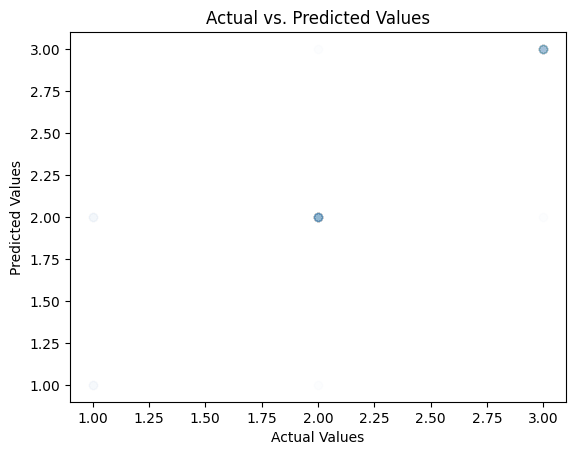

Importances for e_fh_status


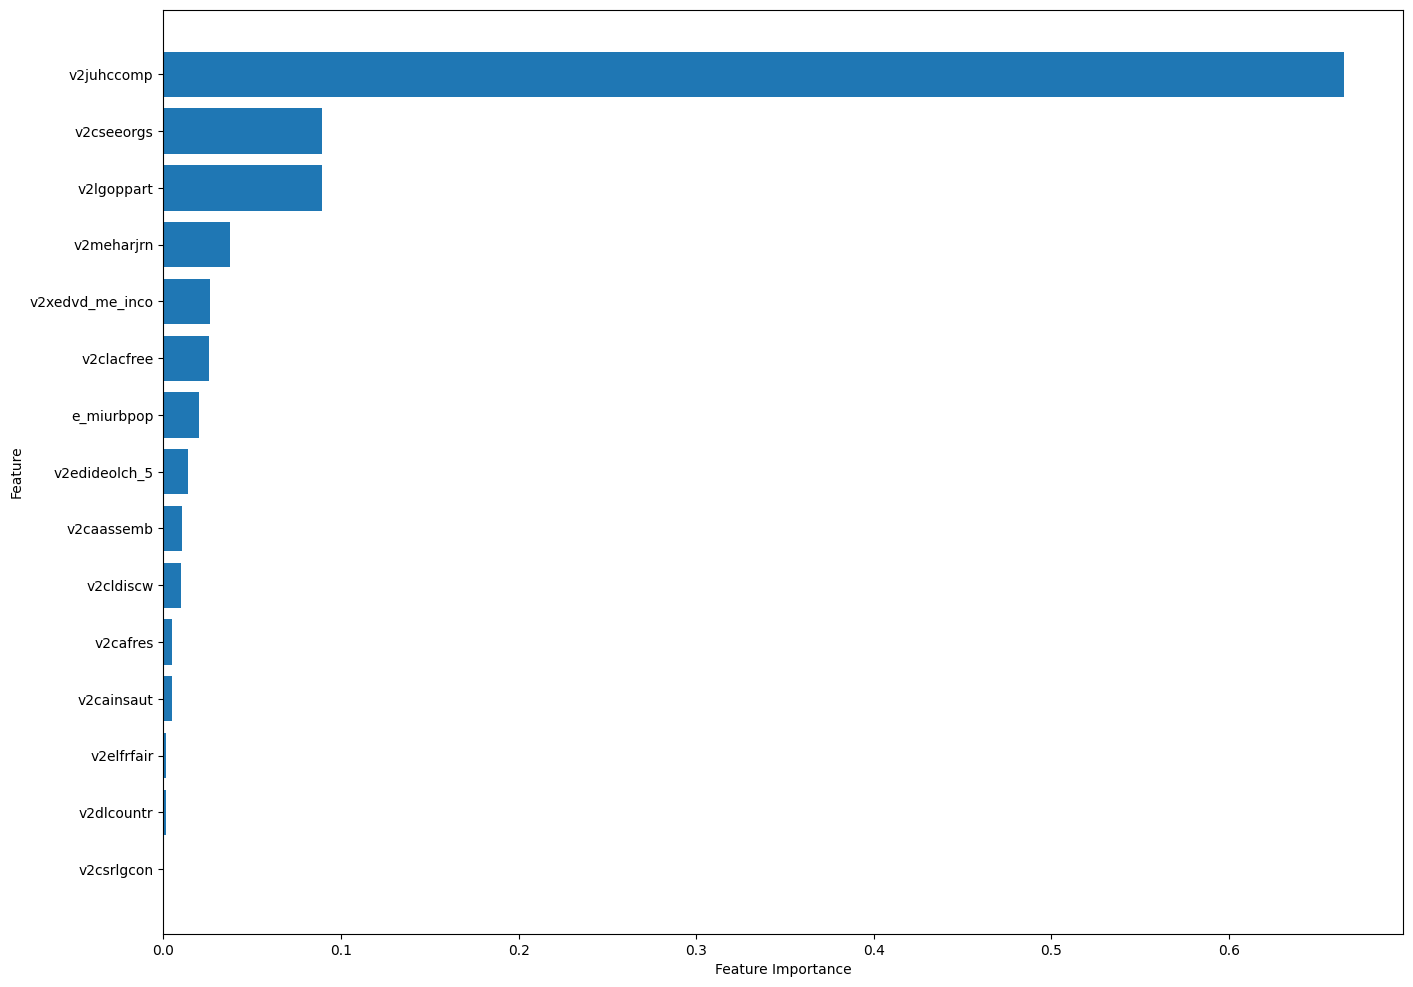

Running model for Oceania...
v2stcritapparm: -0.7509;                    Count: 25736
v2x_regime: -0.7376;                    Count: 19401
v2clacfree: -0.7374;                    Count: 27681
v2jupurge: -0.7360;                    Count: 19164
v2x_regime_amb: -0.7327;                    Count: 19401
v2x_freexp: -0.7319;                    Count: 27247
v2cldiscm: -0.7245;                    Count: 27693
v2x_polyarchy: -0.7234;                    Count: 26595
v2exaphogp: -0.7182;                    Count: 11348
v2x_civlib: -0.7153;                    Count: 27303
v2x_mpi: -0.7111;                    Count: 26595
v2x_liberal: -0.7109;                    Count: 26085
v2xcl_disc: -0.7101;                    Count: 27693
v2x_EDcomp_thick: -0.7052;                    Count: 26771
v2x_libdem: -0.7051;                    Count: 25350
v2x_diagacc: -0.7038;                    Count: 19362
v2jupoatck: -0.7017;                    Count: 19269
e_polity2: -0.7012;                    Count: 17156
v2cl

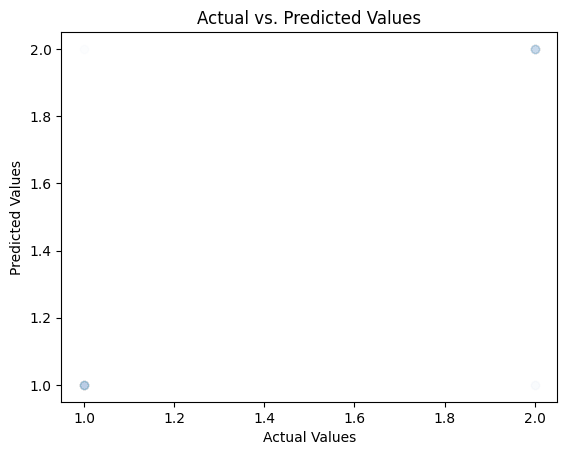

Importances for e_fh_status


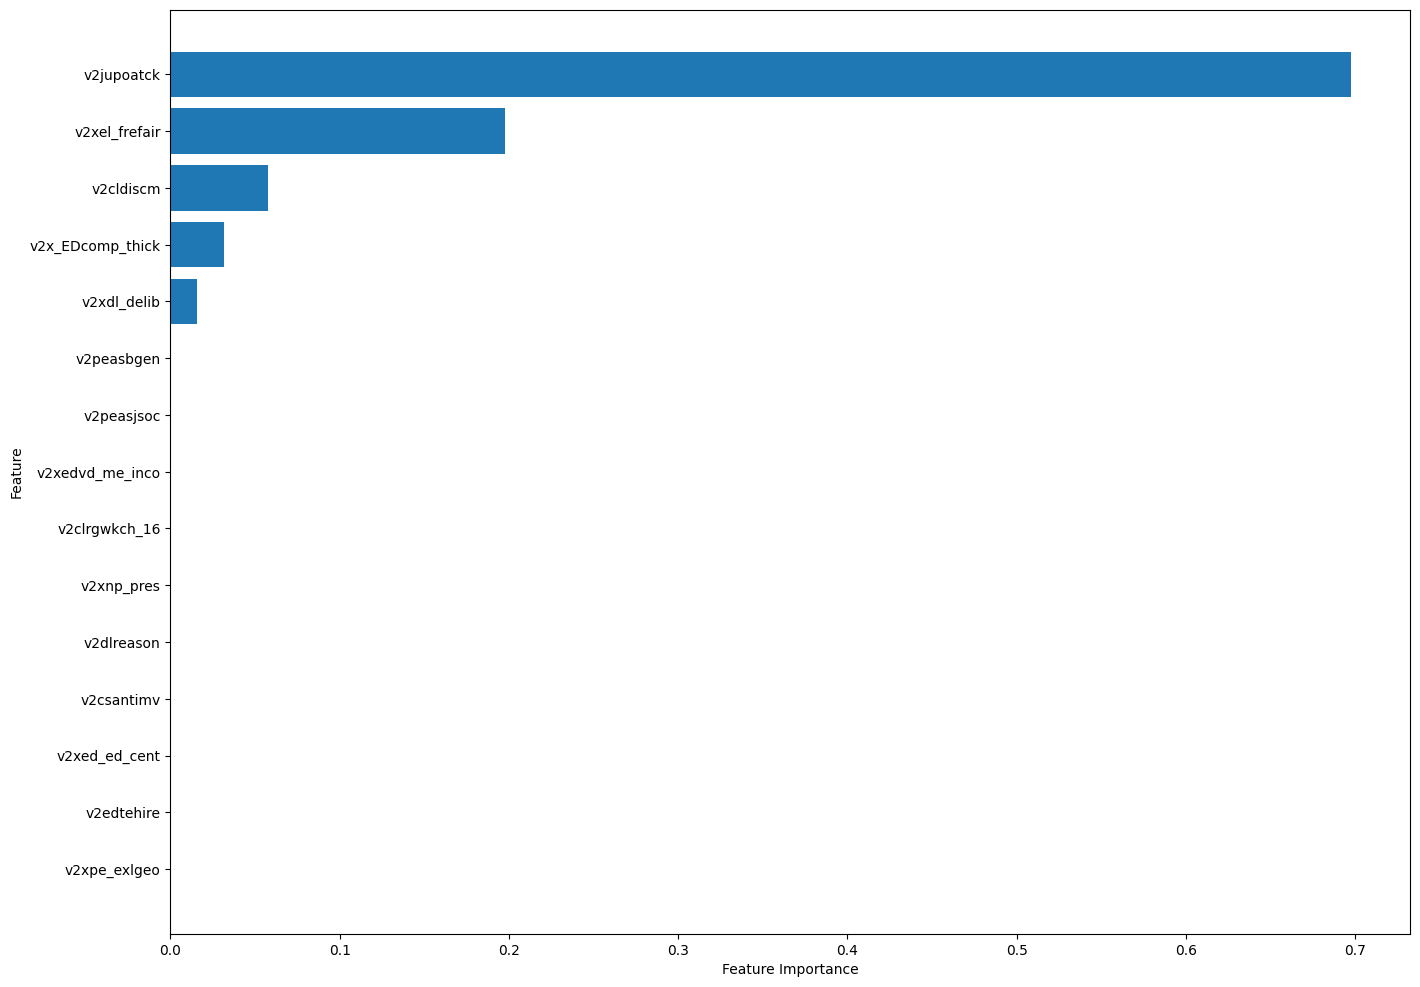

In [ ]:


# Run models for each region and store results in separate variables
na_model, na_features, na_corrs = run_model_for_region("North America")
la_model, la_features, la_corrs = run_model_for_region("Latin America")
eu_model, eu_features, eu_corrs = run_model_for_region("Europe")
ssa_model, ssa_features, ssa_corrs = run_model_for_region("Sub-Saharan Africa")
mena_model, mena_features, mena_corrs = run_model_for_region("Middle East & North Africa (MENA)")
sa_model, sa_features, sa_corrs = run_model_for_region("South Asia")
ea_model, ea_features, ea_corrs = run_model_for_region("East Asia")
sea_model, sea_features, sea_corrs = run_model_for_region("Southeast Asia")
oceania_model, oceania_features, oceania_corrs = run_model_for_region("Oceania")

v2x_polyarchy: -0.8602;                    Count: 26595
v2x_libdem: -0.8559;                    Count: 25350
v2x_accountability: -0.8455;                    Count: 19362
v2x_EDcomp_thick: -0.8420;                    Count: 26771
v2x_liberal: -0.8392;                    Count: 26085
v2x_mpi: -0.8391;                    Count: 26595
v2x_delibdem: -0.8382;                    Count: 19308
v2xedvd_me_ctag: 0.8322;                    Count: 10720
v2x_partipdem: -0.8313;                    Count: 25982
v2x_api: -0.8297;                    Count: 26595
v2x_regime_amb: -0.8239;                    Count: 19401
e_polity2: -0.8236;                    Count: 17156
v2xnp_pres: 0.8235;                    Count: 26767
v2x_civlib: -0.8205;                    Count: 27303
v2xedvd_me_inco: 0.8195;                    Count: 12692
v2x_clpol: -0.8186;                    Count: 27393
v2x_diagacc: -0.8155;                    Count: 19362
v2xel_frefair: -0.8137;                    Count: 27612
v2caassemb: -0.8

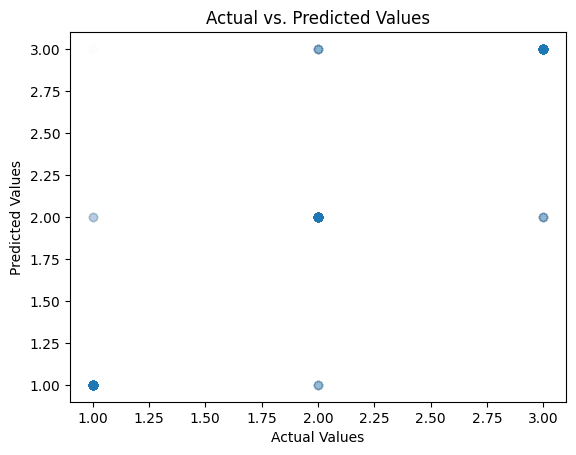

Importances for e_fh_status


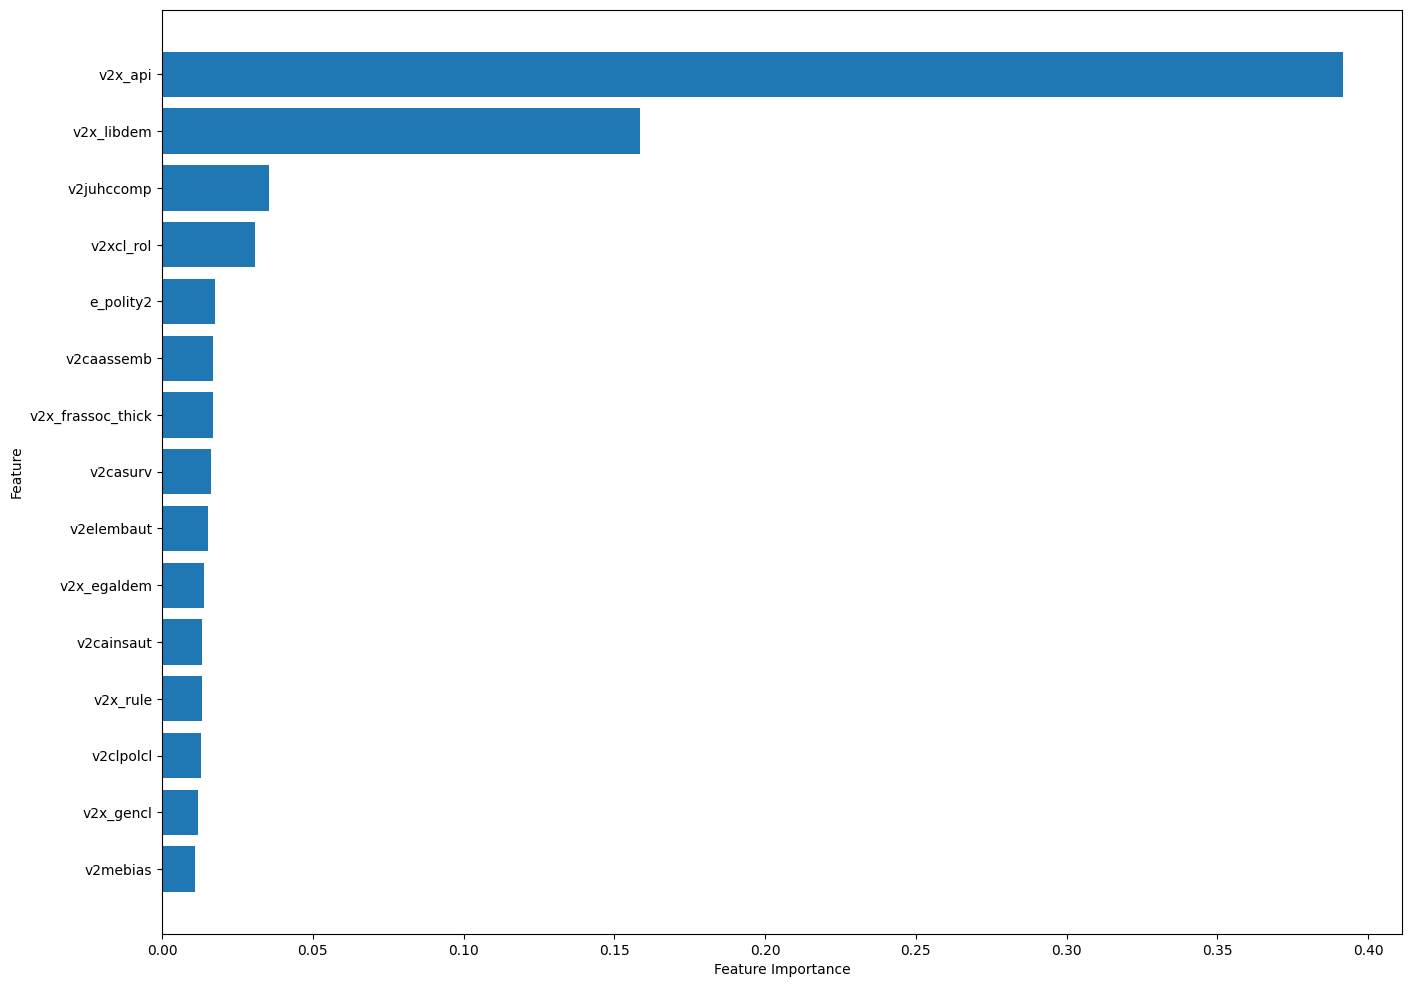

In [ ]:
status_model, status_top, status_corrs = imputing_model(vdem_pop, 'e_fh_status')

v2x_libdem: -0.8948;                    Count: 25350
v2x_polyarchy: -0.8910;                    Count: 26595
v2x_accountability: -0.8875;                    Count: 19362
v2x_civlib: -0.8787;                    Count: 27303
v2x_delibdem: -0.8779;                    Count: 19308
v2x_liberal: -0.8752;                    Count: 26085
v2x_partipdem: -0.8742;                    Count: 25982
v2xedvd_me_ctag: 0.8724;                    Count: 10720
v2x_mpi: -0.8708;                    Count: 26595
v2x_diagacc: -0.8687;                    Count: 19362
v2x_EDcomp_thick: -0.8637;                    Count: 26771
v2xcl_rol: -0.8624;                    Count: 27616
v2caassemb: -0.8599;                    Count: 18995
v2x_freexp: -0.8591;                    Count: 27247
v2x_clpol: -0.8586;                    Count: 27393
v2x_egaldem: -0.8582;                    Count: 19308
v2x_api: -0.8576;                    Count: 26595
v2x_regime_amb: -0.8535;                    Count: 19401
v2xedvd_me_inco: 0.85

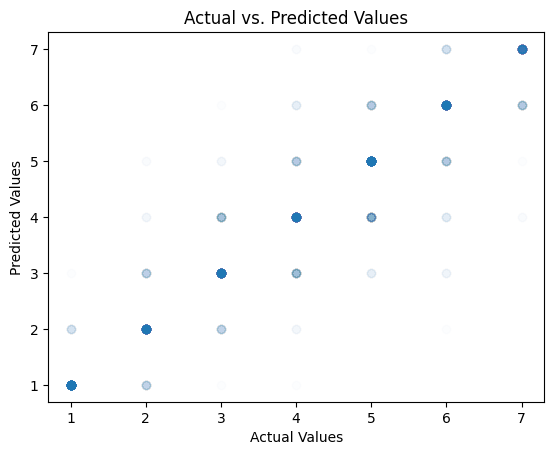

Importances for e_fh_cl


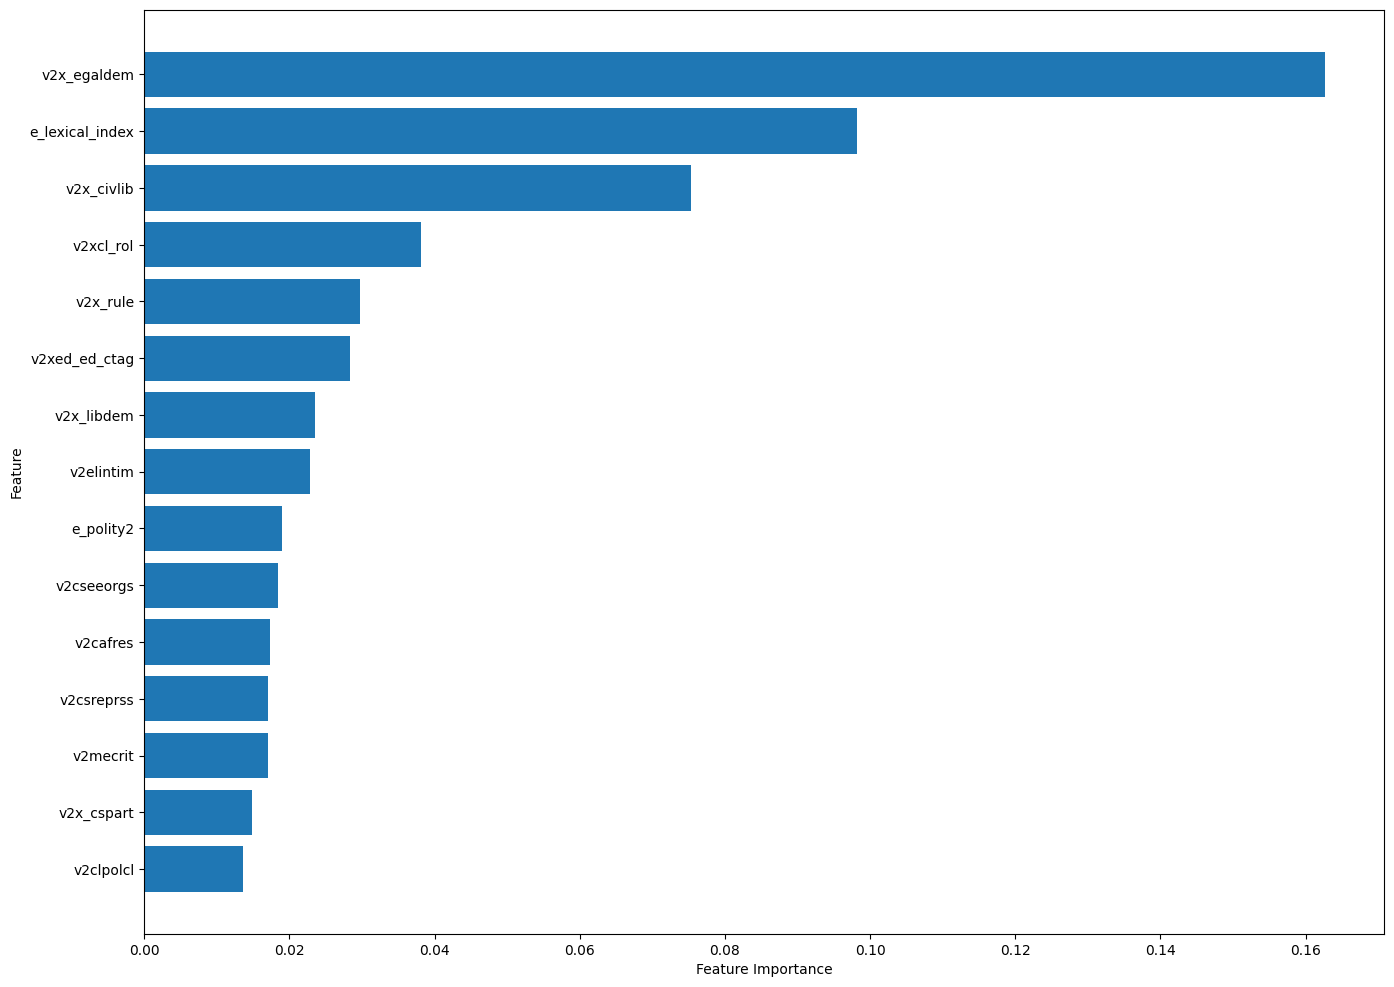

In [ ]:
cl_model, cl_top, cl_corrs = imputing_model(vdem_pop, 'e_fh_cl')

v2x_polyarchy: -0.9146;                    Count: 26595
v2x_libdem: -0.9051;                    Count: 25350
v2x_EDcomp_thick: -0.9003;                    Count: 26771
v2x_accountability: -0.8947;                    Count: 19362
v2x_mpi: -0.8908;                    Count: 26595
v2x_delibdem: -0.8883;                    Count: 19308
e_polity2: -0.8853;                    Count: 17156
v2x_api: -0.8838;                    Count: 26595
v2x_regime_amb: -0.8837;                    Count: 19401
v2x_partipdem: -0.8836;                    Count: 25982
v2x_liberal: -0.8825;                    Count: 26085
v2xedvd_me_ctag: 0.8726;                    Count: 10720
v2x_regime: -0.8674;                    Count: 19401
v2xel_frefair: -0.8668;                    Count: 27612
e_democracy_omitteddata: -0.8662;                    Count: 17631
e_boix_regime: -0.8653;                    Count: 17855
v2xnp_pres: 0.8653;                    Count: 26767
e_lexical_index: -0.8634;                    Count: 26721

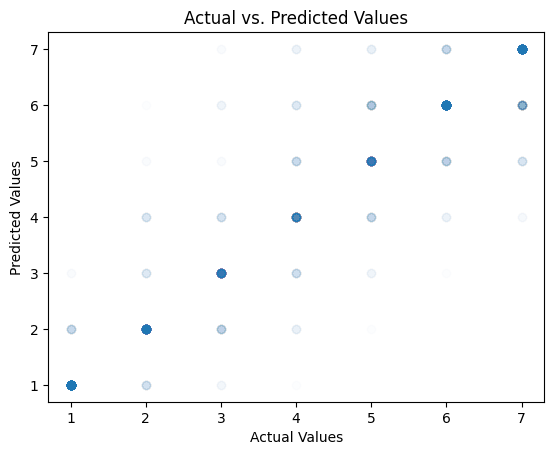

Importances for e_fh_pr


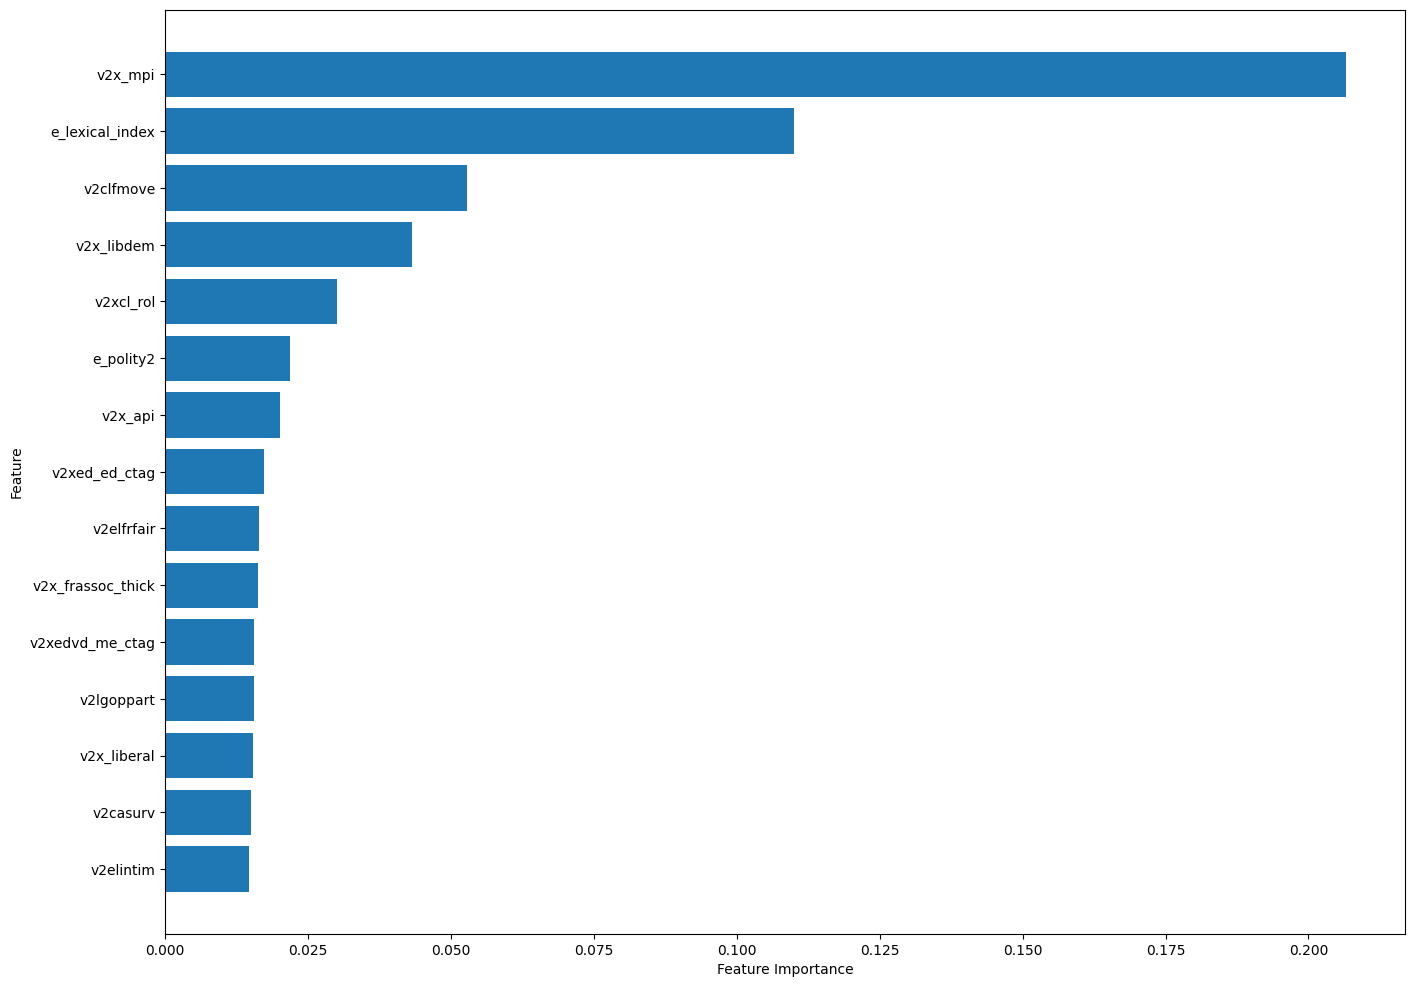

In [ ]:
pr_model, pr_top, pr_corrs = imputing_model(vdem_pop, 'e_fh_pr')

In [ ]:
vdem_uds = vdem.dropna(subset=['e_uds_median'])[cleaned_keys]
vdem_uds.describe()

,country_id,year,project,historical,codingstart,codingend,codingstart_contemp,codingend_contemp,codingstart_hist,codingend_hist,...,e_mipopula,e_miurbani,e_pefeliex,e_wb_pop,e_pechmor,e_miinteco,e_civil_war,e_miinterc,e_pt_coup,e_pt_coup_attempts
count,9258.00000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,9258.000000,4521.000000,4521.000000,...,6.553000e+03,6219.000000,5691.000000,7.918000e+03,9168.000000,7020.000000,7784.000000,7020.000000,8953.000000,8953.000000
mean,91.63545,1983.299633,0.010369,0.488334,1859.516958,2022.659430,1909.043962,2022.659430,1801.230259,1922.668879,...,2.777391e+04,0.331776,63.642585,3.231053e+07,100.197358,0.055556,0.074769,0.135755,0.025243,0.051491
std,57.18047,18.235751,0.143644,0.499891,61.581006,3.571749,20.040359,3.571749,21.615093,10.191369,...,1.022409e+05,0.205857,12.243100,1.150697e+08,93.777417,0.229078,0.263035,0.342553,0.167211,0.256998
min,3.00000,1946.000000,0.000000,0.000000,1789.000000,1975.000000,1900.000000,1975.000000,1789.000000,1918.000000,...,6.153600e+01,0.002000,30.810000,6.050400e+04,2.430000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.00000,1969.000000,0.000000,0.000000,1789.000000,2023.000000,1900.000000,2023.000000,1789.000000,1920.000000,...,2.501000e+03,0.193000,53.208500,2.650934e+06,23.100000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.00000,1985.000000,0.000000,0.000000,1900.000000,2023.000000,1900.000000,2023.000000,1789.000000,1920.000000,...,6.879655e+03,0.305000,67.206000,7.485128e+06,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,134.00000,1999.000000,0.000000,1.000000,1900.000000,2023.000000,1911.000000,2023.000000,1809.000000,1920.000000,...,1.695600e+04,0.408000,73.744000,2.127997e+07,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,210.00000,2012.000000,2.000000,1.000000,2011.000000,2023.000000,2011.000000,2023.000000,1878.000000,2010.000000,...,1.262645e+06,1.792000,84.580000,1.354190e+09,450.000000,1.000000,1.000000,1.000000,3.000000,4.000000


v2x_polyarchy: 0.9439;                    Count: 26595
e_polity2: 0.9316;                    Count: 17156
v2x_libdem: 0.9285;                    Count: 25350
v2x_EDcomp_thick: 0.9279;                    Count: 26771
v2x_accountability: 0.9277;                    Count: 19362
v2x_partipdem: 0.9253;                    Count: 25982
v2x_api: 0.9230;                    Count: 26595
v2x_delibdem: 0.9215;                    Count: 19308
v2x_regime_amb: 0.9186;                    Count: 19401
e_vanhanen: 0.9148;                    Count: 16137
v2x_mpi: 0.9122;                    Count: 26595
v2x_regime: 0.9046;                    Count: 19401
v2x_clpol: 0.9007;                    Count: 27393
v2x_diagacc: 0.8996;                    Count: 19362
v2x_egaldem: 0.8969;                    Count: 19308
v2x_frassoc_thick: 0.8954;                    Count: 27061
v2xedvd_me_ctag: -0.8942;                    Count: 10720
v2x_freexp_altinf: 0.8937;                    Count: 27198
v2x_freexp: 0.8907;     

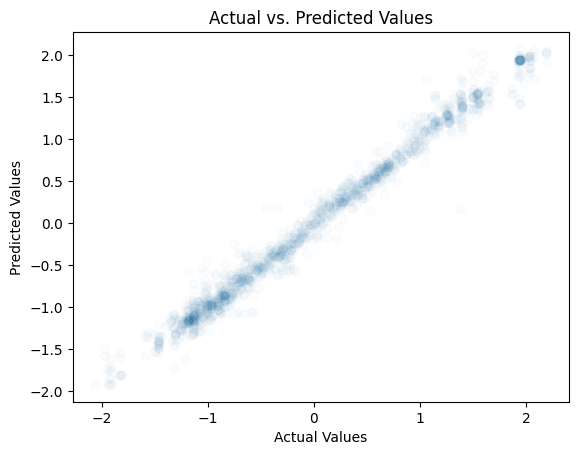

Importances for e_uds_median


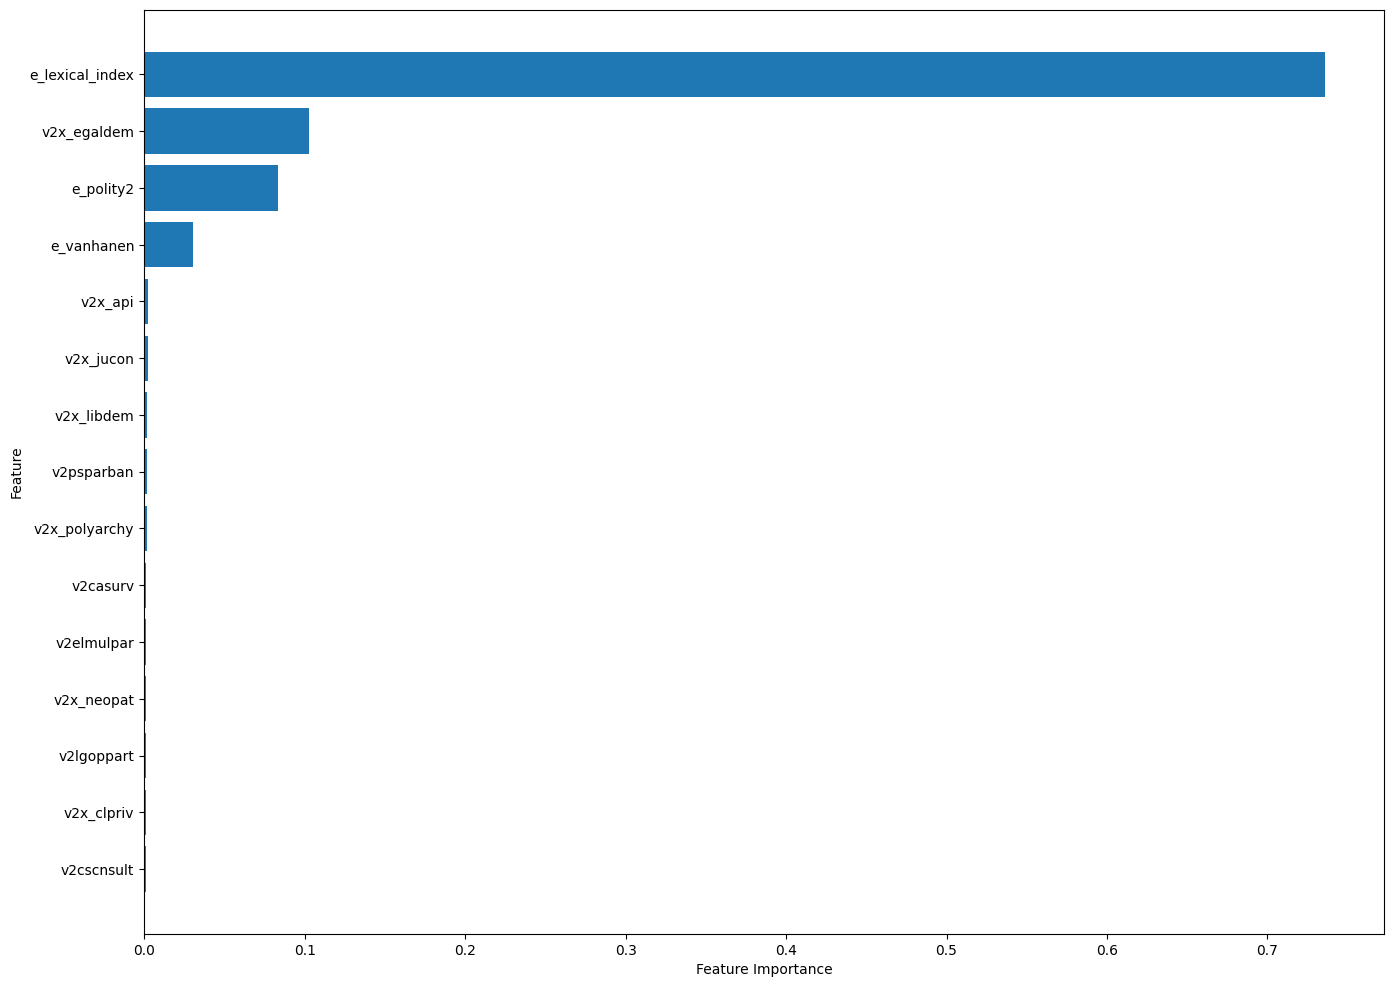

In [ ]:
uds_model, uds_top, uds_corrs = imputing_model(vdem_pop, 'e_uds_median')

Split: 5
---------------------------------------------------------------
v2x_libdem: -0.8948;                    Count: 25350
v2x_polyarchy: -0.8910;                    Count: 26595
v2x_accountability: -0.8875;                    Count: 19362
v2x_civlib: -0.8787;                    Count: 27303
v2x_delibdem: -0.8779;                    Count: 19308
v2x_liberal: -0.8752;                    Count: 26085
v2x_partipdem: -0.8742;                    Count: 25982
v2xedvd_me_ctag: 0.8724;                    Count: 10720
v2x_mpi: -0.8708;                    Count: 26595
v2x_diagacc: -0.8687;                    Count: 19362
v2x_EDcomp_thick: -0.8637;                    Count: 26771
v2xcl_rol: -0.8624;                    Count: 27616
v2caassemb: -0.8599;                    Count: 18995
v2x_freexp: -0.8591;                    Count: 27247
v2x_clpol: -0.8586;                    Count: 27393
v2x_egaldem: -0.8582;                    Count: 19308
v2x_api: -0.8576;                    Count: 26595
v2x_r

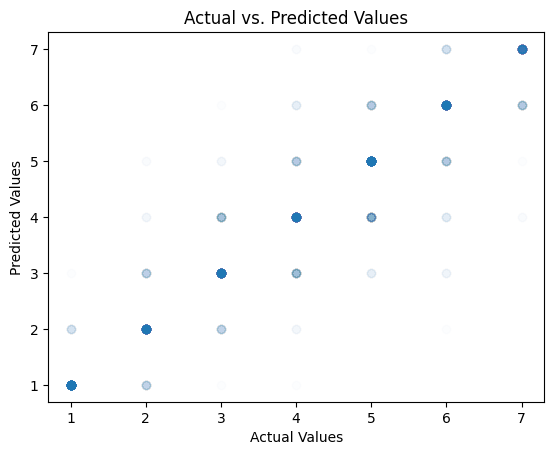

Importances for e_fh_cl


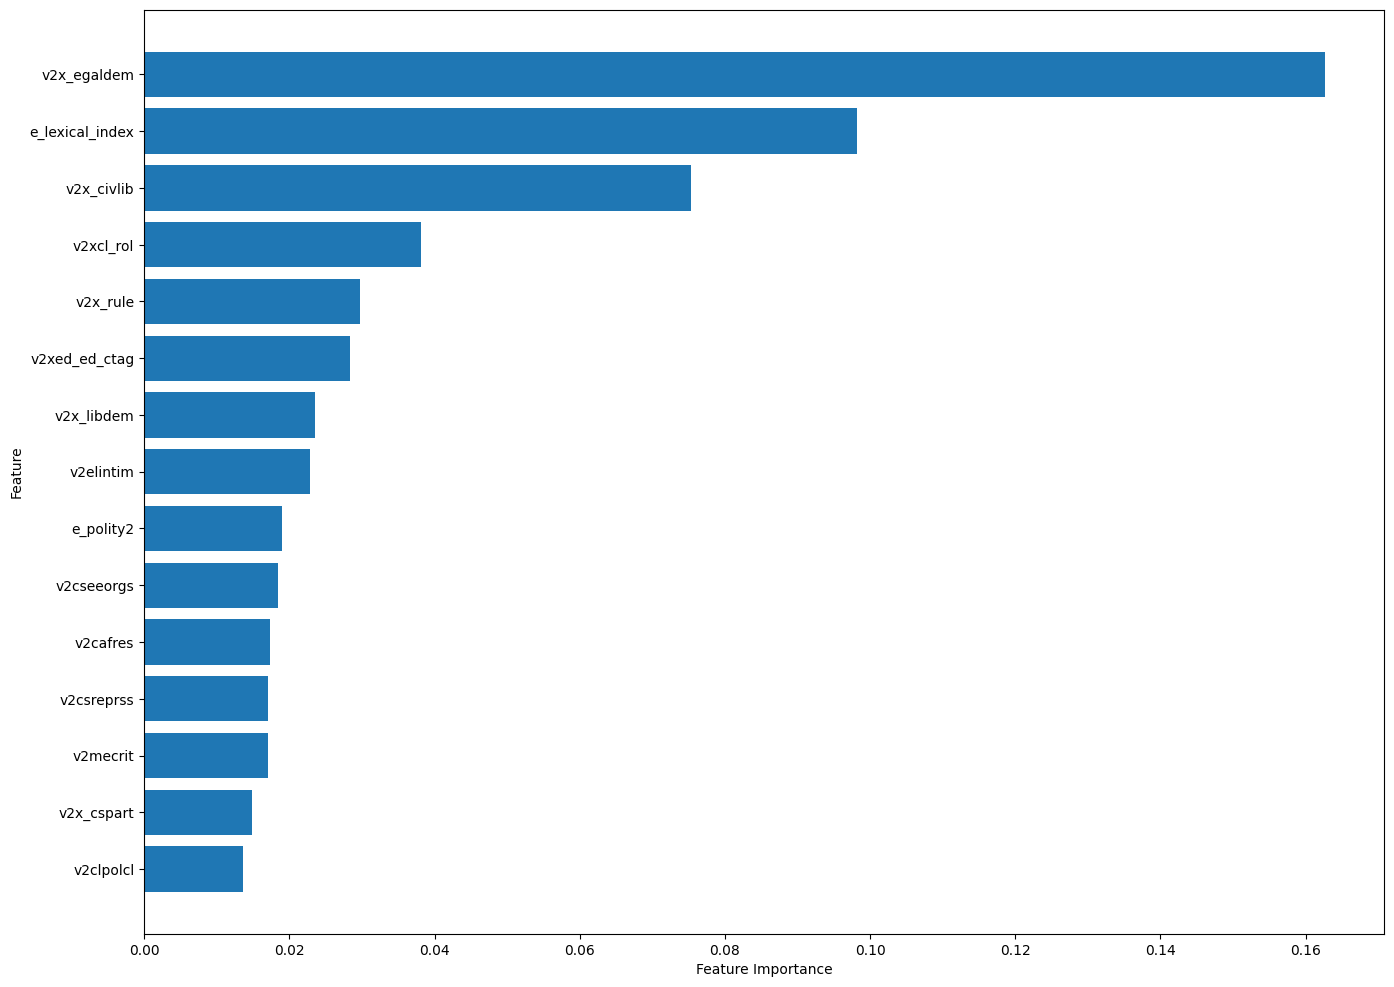

Split: 10
---------------------------------------------------------------
v2x_libdem: -0.8948;                    Count: 25350
v2x_polyarchy: -0.8910;                    Count: 26595
v2x_accountability: -0.8875;                    Count: 19362
v2x_civlib: -0.8787;                    Count: 27303
v2x_delibdem: -0.8779;                    Count: 19308
v2x_liberal: -0.8752;                    Count: 26085
v2x_partipdem: -0.8742;                    Count: 25982
v2xedvd_me_ctag: 0.8724;                    Count: 10720
v2x_mpi: -0.8708;                    Count: 26595
v2x_diagacc: -0.8687;                    Count: 19362
v2x_EDcomp_thick: -0.8637;                    Count: 26771
v2xcl_rol: -0.8624;                    Count: 27616
v2caassemb: -0.8599;                    Count: 18995
v2x_freexp: -0.8591;                    Count: 27247
v2x_clpol: -0.8586;                    Count: 27393
v2x_egaldem: -0.8582;                    Count: 19308
v2x_api: -0.8576;                    Count: 26595
v2x_

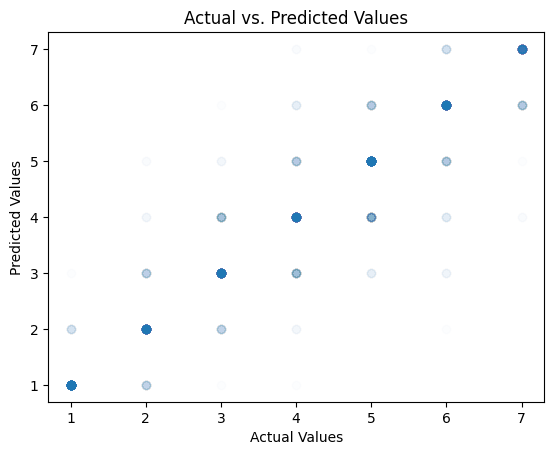

Importances for e_fh_cl


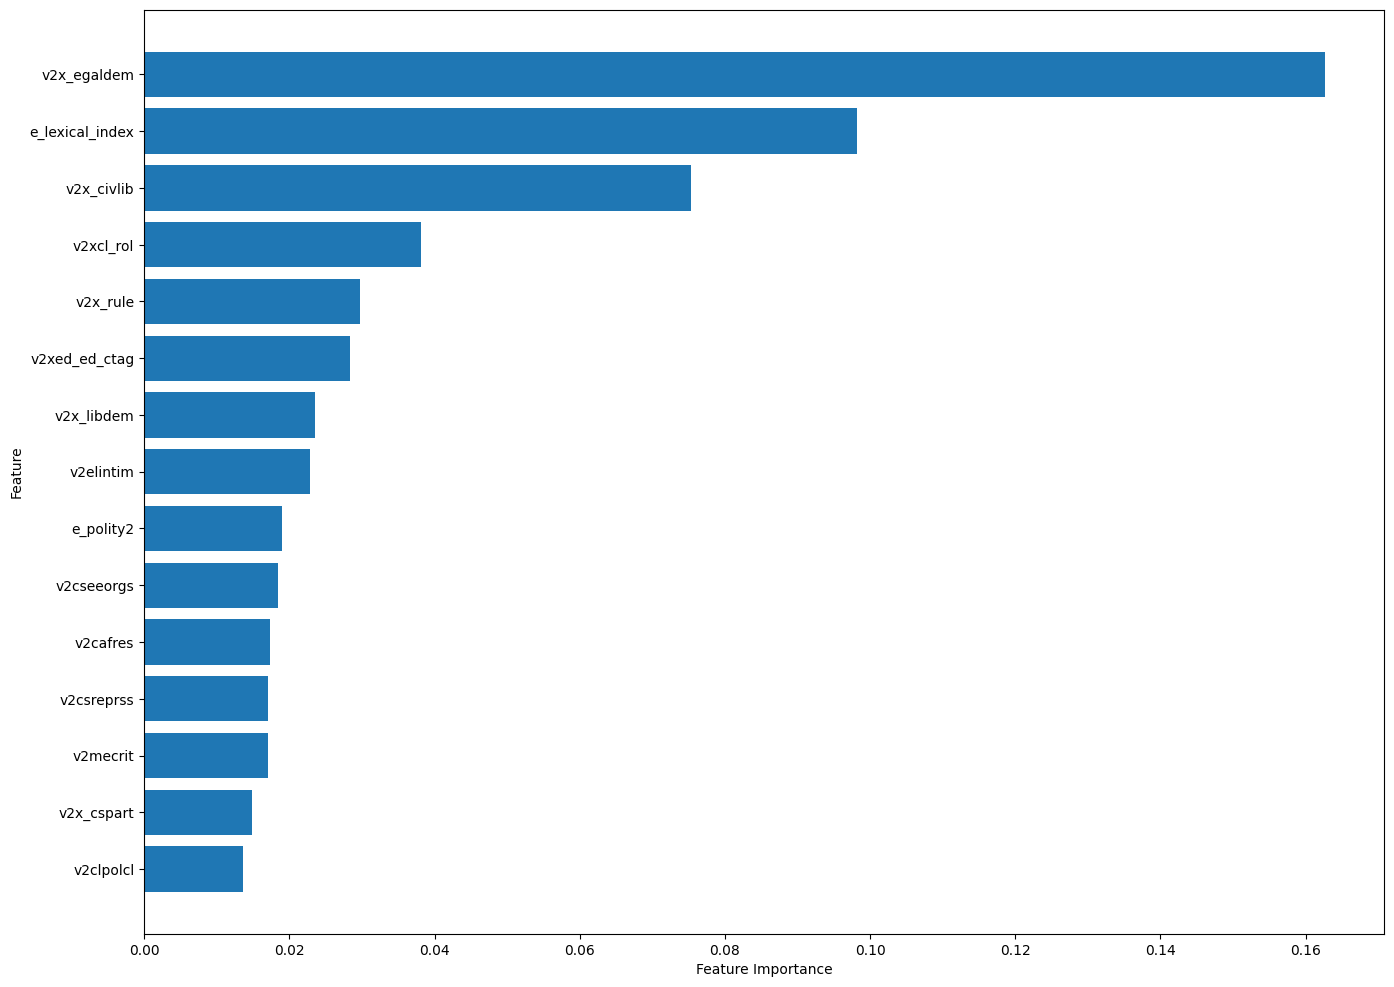

Split: 20
---------------------------------------------------------------
v2x_libdem: -0.8948;                    Count: 25350
v2x_polyarchy: -0.8910;                    Count: 26595
v2x_accountability: -0.8875;                    Count: 19362
v2x_civlib: -0.8787;                    Count: 27303
v2x_delibdem: -0.8779;                    Count: 19308
v2x_liberal: -0.8752;                    Count: 26085
v2x_partipdem: -0.8742;                    Count: 25982
v2xedvd_me_ctag: 0.8724;                    Count: 10720
v2x_mpi: -0.8708;                    Count: 26595
v2x_diagacc: -0.8687;                    Count: 19362
v2x_EDcomp_thick: -0.8637;                    Count: 26771
v2xcl_rol: -0.8624;                    Count: 27616
v2caassemb: -0.8599;                    Count: 18995
v2x_freexp: -0.8591;                    Count: 27247
v2x_clpol: -0.8586;                    Count: 27393
v2x_egaldem: -0.8582;                    Count: 19308
v2x_api: -0.8576;                    Count: 26595
v2x_

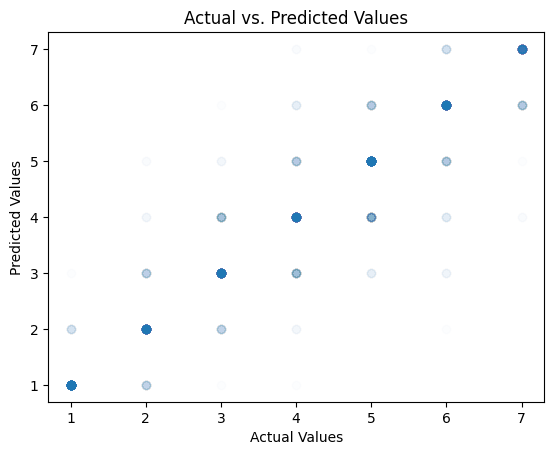

Importances for e_fh_cl


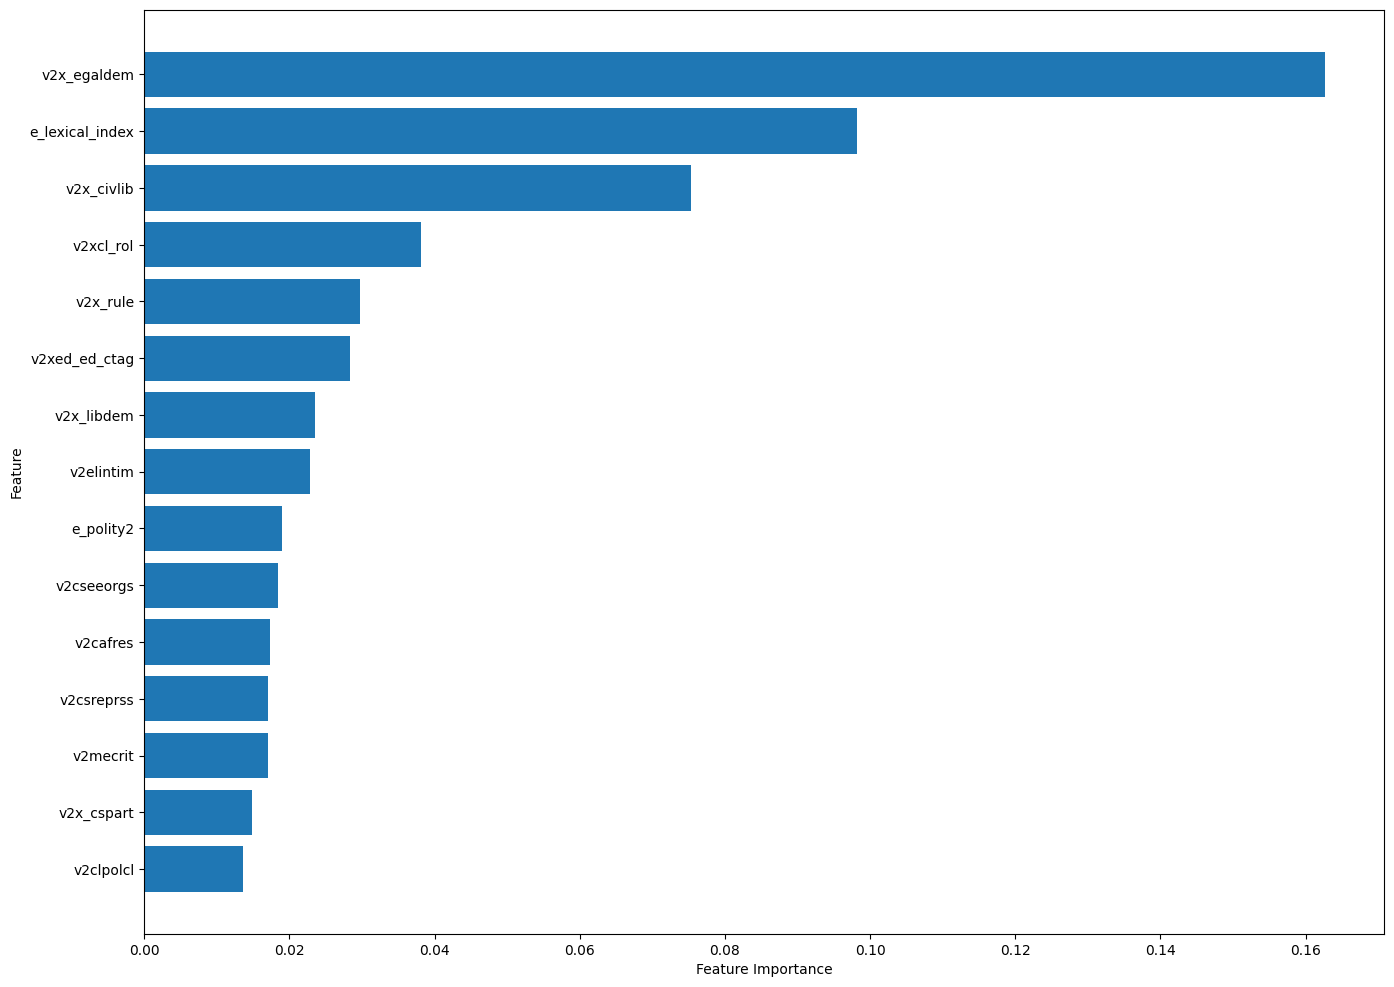

Split: 25
---------------------------------------------------------------
v2x_libdem: -0.8948;                    Count: 25350
v2x_polyarchy: -0.8910;                    Count: 26595
v2x_accountability: -0.8875;                    Count: 19362
v2x_civlib: -0.8787;                    Count: 27303
v2x_delibdem: -0.8779;                    Count: 19308
v2x_liberal: -0.8752;                    Count: 26085
v2x_partipdem: -0.8742;                    Count: 25982
v2xedvd_me_ctag: 0.8724;                    Count: 10720
v2x_mpi: -0.8708;                    Count: 26595
v2x_diagacc: -0.8687;                    Count: 19362
v2x_EDcomp_thick: -0.8637;                    Count: 26771
v2xcl_rol: -0.8624;                    Count: 27616
v2caassemb: -0.8599;                    Count: 18995
v2x_freexp: -0.8591;                    Count: 27247
v2x_clpol: -0.8586;                    Count: 27393
v2x_egaldem: -0.8582;                    Count: 19308
v2x_api: -0.8576;                    Count: 26595
v2x_

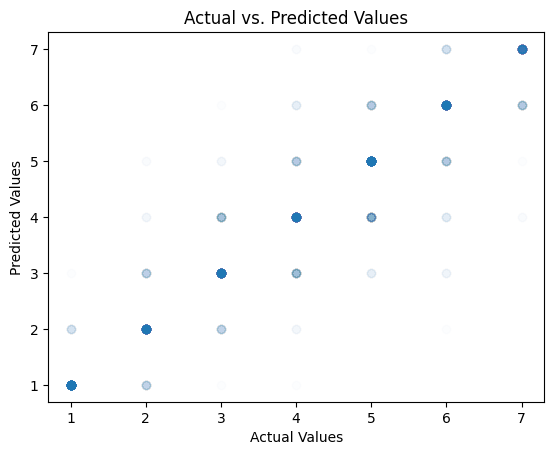

Importances for e_fh_cl


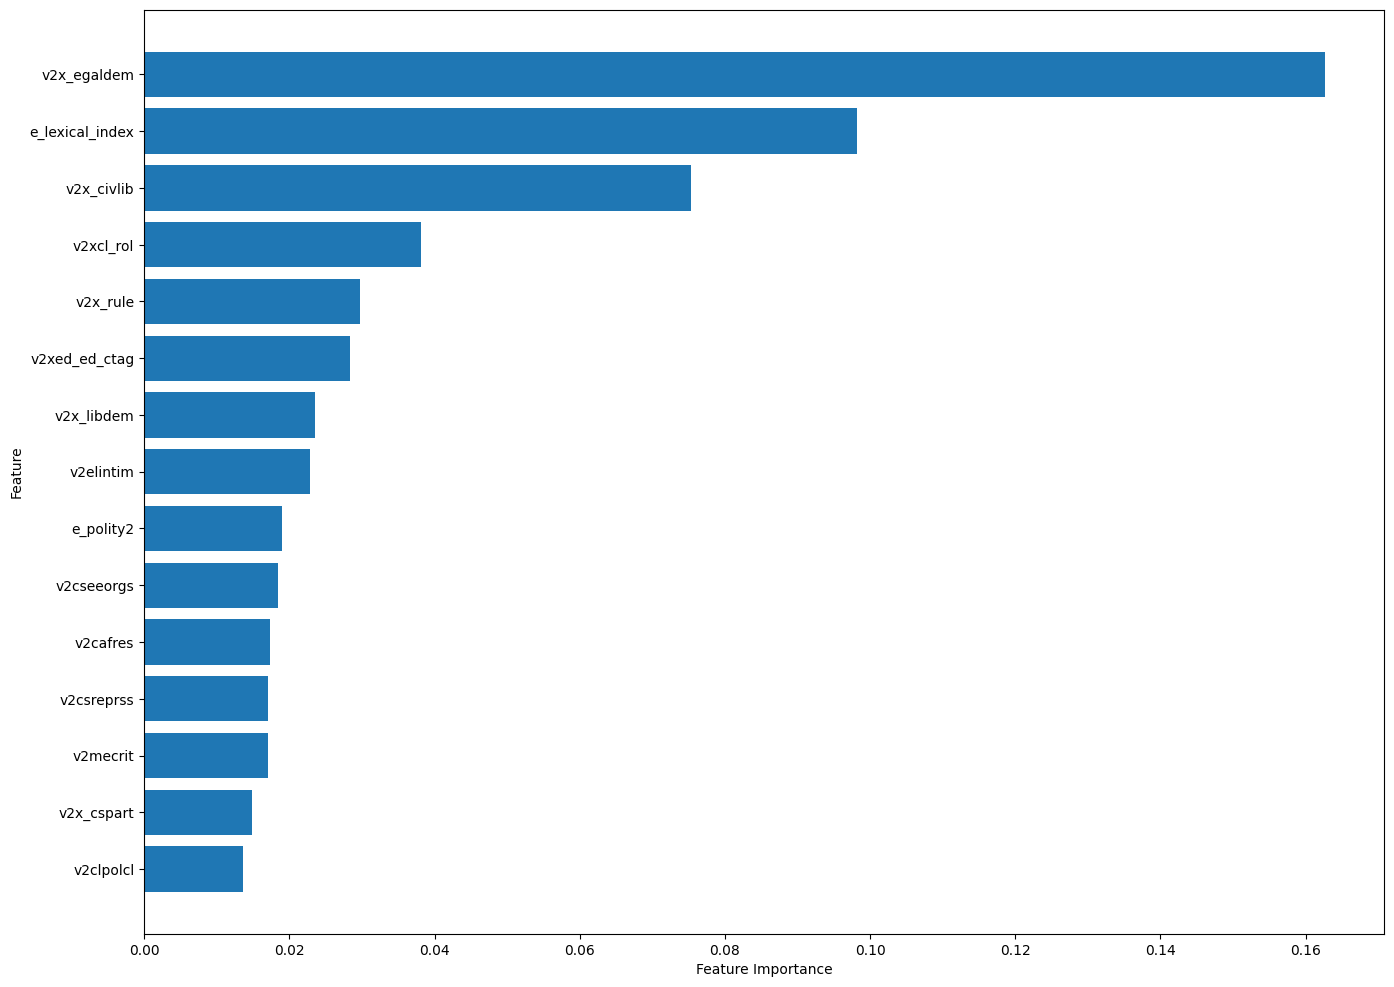

Split: 30
---------------------------------------------------------------
v2x_libdem: -0.8948;                    Count: 25350
v2x_polyarchy: -0.8910;                    Count: 26595
v2x_accountability: -0.8875;                    Count: 19362
v2x_civlib: -0.8787;                    Count: 27303
v2x_delibdem: -0.8779;                    Count: 19308
v2x_liberal: -0.8752;                    Count: 26085
v2x_partipdem: -0.8742;                    Count: 25982
v2xedvd_me_ctag: 0.8724;                    Count: 10720
v2x_mpi: -0.8708;                    Count: 26595
v2x_diagacc: -0.8687;                    Count: 19362
v2x_EDcomp_thick: -0.8637;                    Count: 26771
v2xcl_rol: -0.8624;                    Count: 27616
v2caassemb: -0.8599;                    Count: 18995
v2x_freexp: -0.8591;                    Count: 27247
v2x_clpol: -0.8586;                    Count: 27393
v2x_egaldem: -0.8582;                    Count: 19308
v2x_api: -0.8576;                    Count: 26595
v2x_

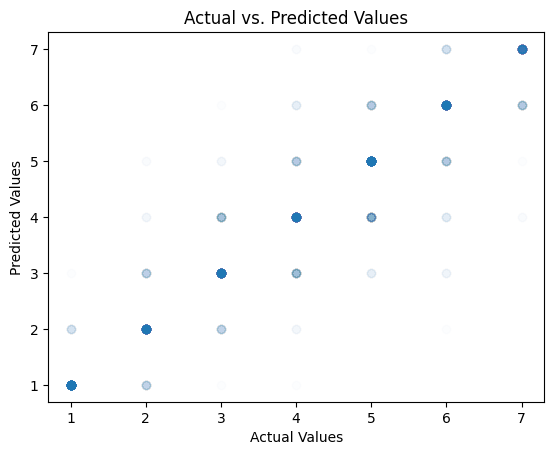

Importances for e_fh_cl


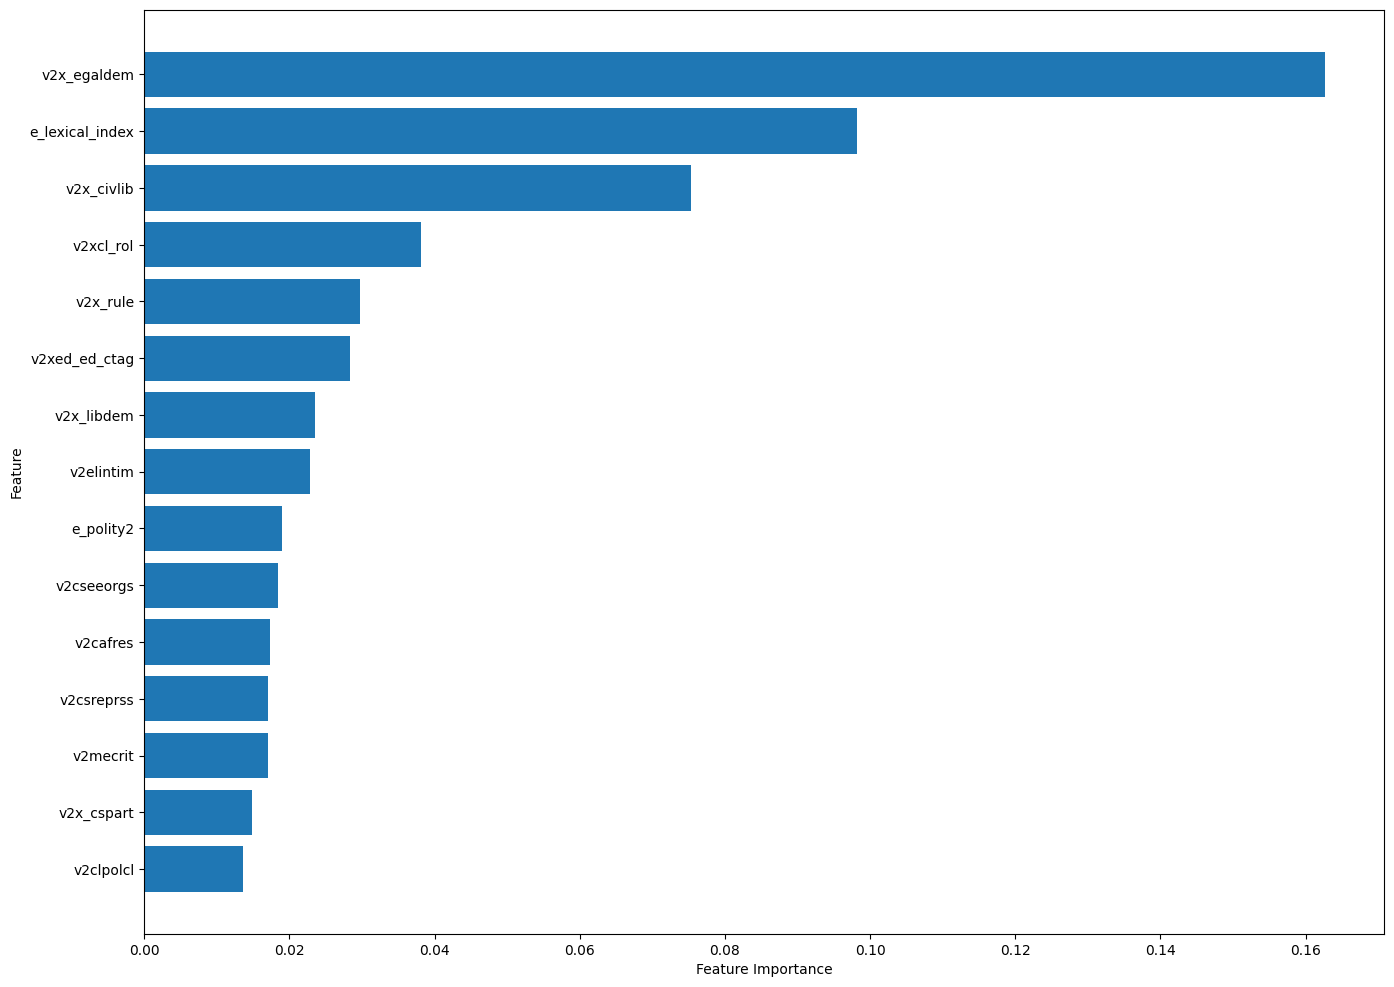

In [ ]:
for sp in [5, 10, 20, 25, 30]:
    print("Split:", sp)
    print('---------------------------------------------------------------')
    cl_model, cl_top, cl_corrs = imputing_model(vdem_pop, 'e_fh_cl', split=sp)

Split: 5
---------------------------------------------------------------
v2x_libdem: -0.8948;                    Count: 25350
v2x_polyarchy: -0.8910;                    Count: 26595
v2x_accountability: -0.8875;                    Count: 19362
v2x_civlib: -0.8787;                    Count: 27303
v2x_delibdem: -0.8779;                    Count: 19308
v2x_liberal: -0.8752;                    Count: 26085
v2x_partipdem: -0.8742;                    Count: 25982
v2xedvd_me_ctag: 0.8724;                    Count: 10720
v2x_mpi: -0.8708;                    Count: 26595
v2x_diagacc: -0.8687;                    Count: 19362
v2x_EDcomp_thick: -0.8637;                    Count: 26771
v2xcl_rol: -0.8624;                    Count: 27616
v2caassemb: -0.8599;                    Count: 18995
v2x_freexp: -0.8591;                    Count: 27247
v2x_clpol: -0.8586;                    Count: 27393
v2x_egaldem: -0.8582;                    Count: 19308
v2x_api: -0.8576;                    Count: 26595
v2x_r

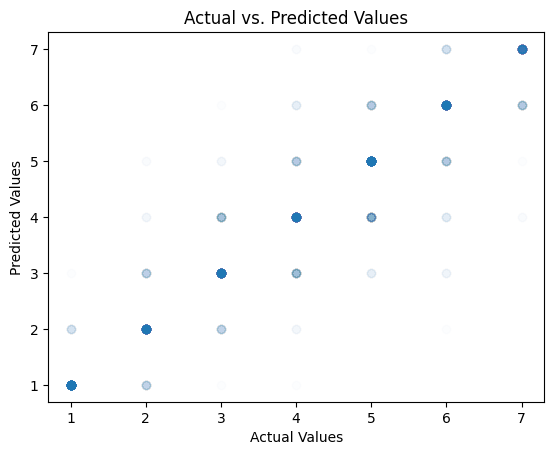

Importances for e_fh_cl


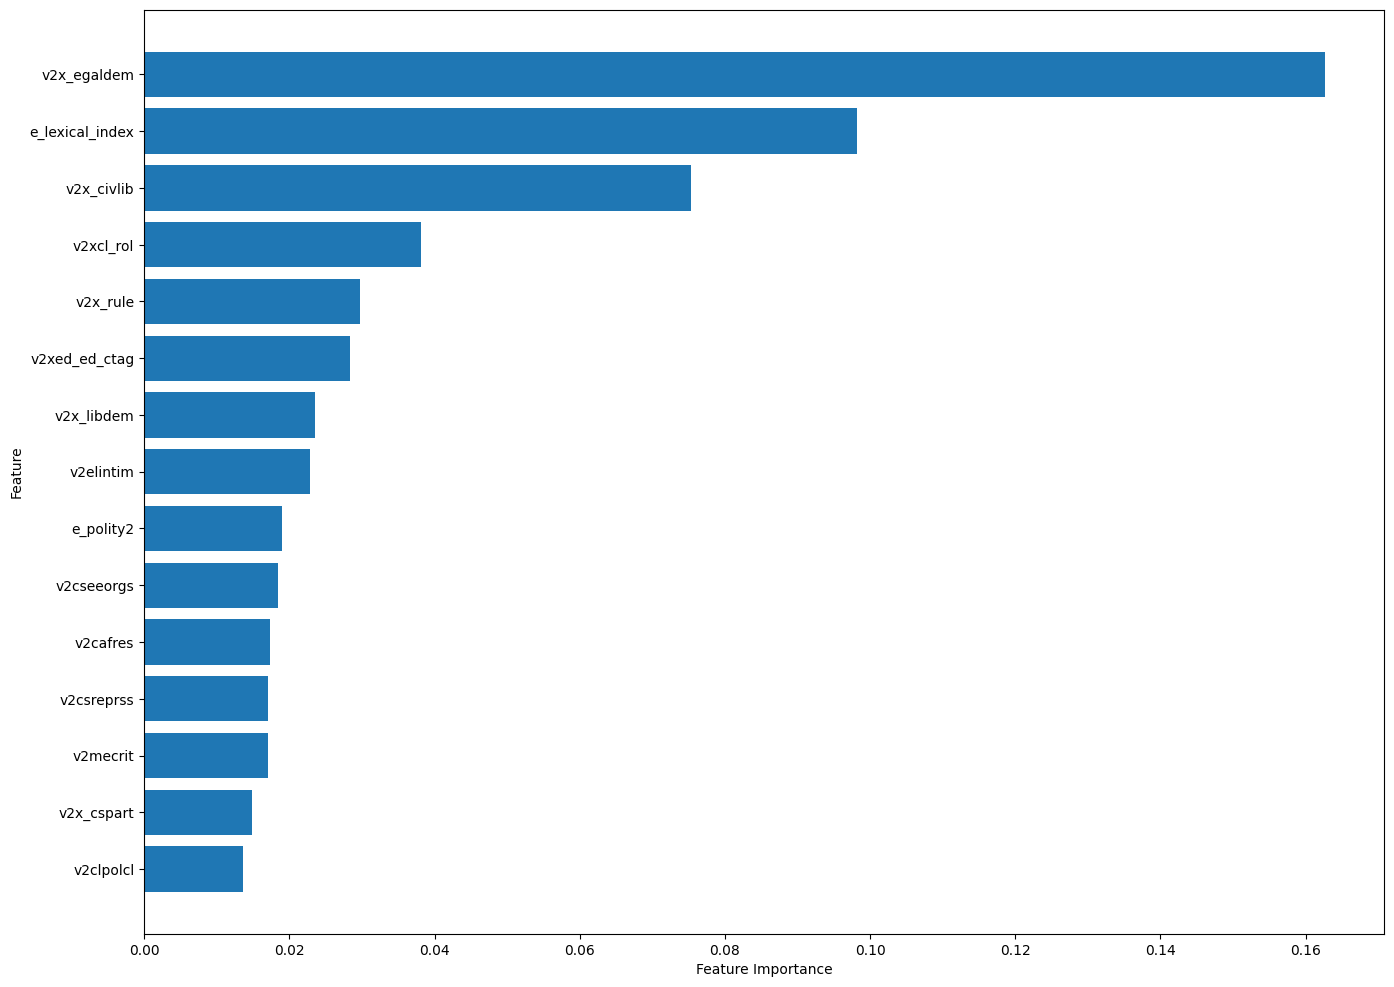

Split: 10
---------------------------------------------------------------


KeyboardInterrupt: 

In [ ]:
for sp in [5, 10, 20, 25, 30]:
    print("Split:", sp)
    print('---------------------------------------------------------------')
    cl_model, cl_top, cl_corrs = imputing_model(vdem_pop, 'e_fh_cl', split=sp)

In [ ]:
vdem_pop['pred_status'] = status_model.predict(vdem_pop[status_top])
vdem_pop['pred_cl'] = cl_model.predict(vdem_pop[cl_top])
vdem_pop['pred_pr'] = pr_model.predict(vdem_pop[pr_top])
vdem_pop['pred_uds'] = uds_model.predict(vdem_pop[uds_top])

In [ ]:
vdem_pop.to_csv('vdem_pop_preds.csv')